<a href="https://colab.research.google.com/github/smedvedeva2412/EU-Sells-Dashboard/blob/main/Python_Matplotlib_Pandas_Analyse%20the%20school%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

In [81]:
deals = pd.read_excel('/content/Updated_Deals (1).xlsx', dtype={'Id': 'Int64', 'Contact Name': 'Int64'})
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2
0,5805028000007843060,Ulysses Adams,2025-01-01,Payment Done,No reason,04.07.23recentlymoved_DE,0.016667,Facebook Ads,Recurring Payments,Digital Marketing,Morning,2023-09-15,11,6.0,1500.0,11960.0,5805028000007854069,Unknown,Unknown,Medium
1,5805028000007754120,Cara Iverson,2023-11-12,Payment Done,No reason,work_DE,13.890278,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007742068,Unknown,Unknown,Low
2,5805028000007744074,Jane Smith,2023-10-18,Payment Done,No reason,work_DE,0.543333,Telegram posts,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007761132,Unknown,Unknown,Low
3,5805028000007647107,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,5.526111,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007649089,Unknown,Unknown,Medium
4,5805028000007623014,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,2.800833,Youtube Ads,Recurring Payments,Digital Marketing,No info,2023-09-14,11,6.0,1500.0,11960.0,5805028000007595085,Unknown,Unknown,Non Target


In [82]:
deals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     13972 non-null  Int64         
 1   Deal Owner Name        13972 non-null  object        
 2   Closing Date           13972 non-null  datetime64[ns]
 3   Stage                  13972 non-null  object        
 4   Lost Reason            13972 non-null  object        
 5   Campaign               13972 non-null  object        
 6   SLA                    13972 non-null  float64       
 7   Source                 13972 non-null  object        
 8   Payment Type           13972 non-null  object        
 9   Product                13972 non-null  object        
 10  Education Type         13972 non-null  object        
 11  Created Time           13972 non-null  datetime64[ns]
 12  Course duration        13972 non-null  int64         
 13  M

In [83]:
contact = pd.read_excel('/content/Updated_Contacts.xlsx', dtype={'Id': 'Int64'})
contact.head()

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,2023-06-27,2023-12-22
1,5805028000000872003,Charlie Davis,2023-07-03,2024-05-21
2,5805028000000889001,Bob Brown,2023-07-02,2023-12-21
3,5805028000000907006,Bob Brown,2023-07-03,2023-12-29
4,5805028000000939010,Nina Scott,2023-07-04,2024-04-16


In [84]:
contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  Int64         
 1   Contact Owner Name  18548 non-null  object        
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), object(1)
memory usage: 597.9+ KB


In [85]:
call = pd.read_excel('/content/Updated_Calls (2).xlsx',  dtype={'Id': 'Int64', 'CONTACTID': 'Int64'})
call.head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,2023-06-30,John Doe,0,Inbound,171.0,Received,Completed,0
1,5805028000000768006,2023-06-30,John Doe,0,Outbound,28.0,Attended Dialled,Completed,0
2,5805028000000764027,2023-06-30,John Doe,0,Outbound,24.0,Attended Dialled,Completed,0
3,5805028000000787003,2023-06-30,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,0
4,5805028000000768019,2023-06-30,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,0


In [86]:
# num_contacts_with_negative_one = (call['CONTACTID'] == -1).sum()
# print("Number of contacts with Id -1:", num_contacts_with_negative_one)

In [87]:
# call['CONTACTID'] = call['CONTACTID'].replace(-1, np.nan)

In [88]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          95874 non-null  Int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  Int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   Outgoing Call Status        95874 non-null  object        
 8   Scheduled in CRM            95874 non-null  int64         
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.8+ MB


In [89]:
spent = pd.read_excel('/content/Updated_Spent (1).xlsx')
spent.head()

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,Without group,No
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,Without group,No
2,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
3,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1
4,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0.58,0,wide,b4


In [90]:
merged_data = pd.merge(call, contact, left_on='CONTACTID', right_on='Id', how='left')

In [91]:
merged_data.head()

,Id_x,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM,Id_y,Contact Owner Name,Created Time,Modified Time
0,5805028000000805001,2023-06-30,John Doe,0,Inbound,171.0,Received,Completed,0,<NA>,NaN,NaT,NaT
1,5805028000000768006,2023-06-30,John Doe,0,Outbound,28.0,Attended Dialled,Completed,0,<NA>,NaN,NaT,NaT
2,5805028000000764027,2023-06-30,John Doe,0,Outbound,24.0,Attended Dialled,Completed,0,<NA>,NaN,NaT,NaT
3,5805028000000787003,2023-06-30,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,0,5805028000000645014,Rachel White,2023-06-27,2023-12-22
4,5805028000000768019,2023-06-30,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,0,5805028000000645014,Rachel White,2023-06-27,2023-12-22


In [92]:
merged_data = merged_data.drop('Id_y', axis=1)

In [93]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id_x                        95874 non-null  Int64         
 1   Call Start Time             95874 non-null  datetime64[ns]
 2   Call Owner Name             95874 non-null  object        
 3   CONTACTID                   95874 non-null  Int64         
 4   Call Type                   95874 non-null  object        
 5   Call Duration (in seconds)  95874 non-null  float64       
 6   Call Status                 95874 non-null  object        
 7   Outgoing Call Status        95874 non-null  object        
 8   Scheduled in CRM            95874 non-null  int64         
 9   Contact Owner Name          91941 non-null  object        
 10  Created Time                91941 non-null  datetime64[ns]
 11  Modified Time               91941 non-null  datetime64

In [94]:
merged_data.head()

,Id_x,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Outgoing Call Status,Scheduled in CRM,Contact Owner Name,Created Time,Modified Time
0,5805028000000805001,2023-06-30,John Doe,0,Inbound,171.0,Received,Completed,0,NaN,NaT,NaT
1,5805028000000768006,2023-06-30,John Doe,0,Outbound,28.0,Attended Dialled,Completed,0,NaN,NaT,NaT
2,5805028000000764027,2023-06-30,John Doe,0,Outbound,24.0,Attended Dialled,Completed,0,NaN,NaT,NaT
3,5805028000000787003,2023-06-30,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,Completed,0,Rachel White,2023-06-27,2023-12-22
4,5805028000000768019,2023-06-30,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,Completed,0,Rachel White,2023-06-27,2023-12-22


In [95]:
print(call['CONTACTID'].dtype)
print(contact['Id'].dtype)
print(deals['Contact Name'].dtype)

Int64
Int64
Int64


# **1.Анализ временных рядов:**

# СТРОЮ ГРАФИКИ ЗАКРЫТИЯ СДЕЛОК И ЗВОНКОВ ДЛЯ ПОНИМАНИЯ ТЕНДЕНЦИИ

In [96]:
deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_by_month = deals_filtered.groupby(deals_filtered['Closing Date'].dt.to_period('M')).size()

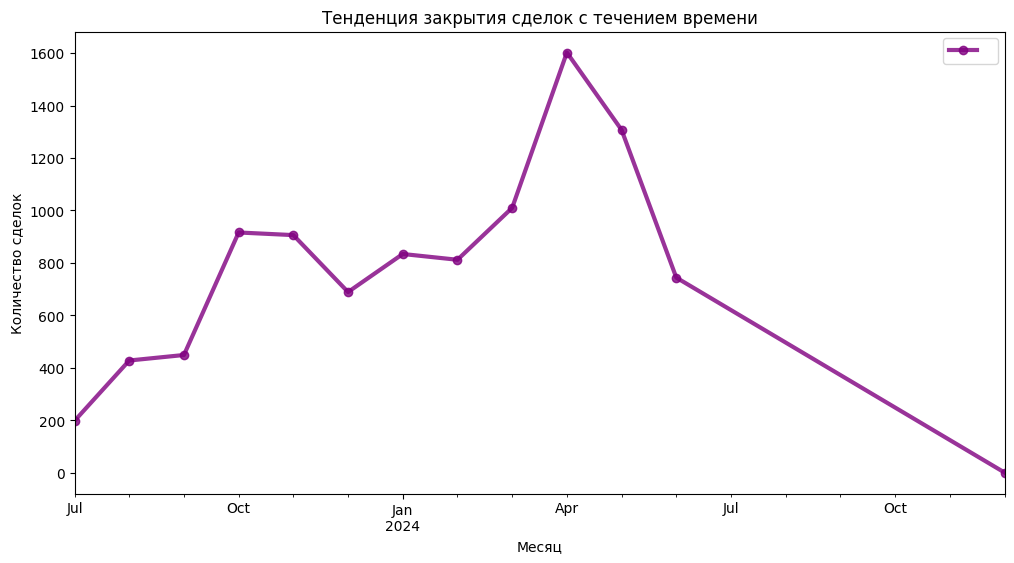

In [97]:
plt.figure(figsize=(12, 6))
deals_by_month.plot(kind='line', alpha=0.8, label=" ", color ='purple', lw=3, marker='o')
plt.title('Тенденция закрытия сделок с течением времени')
plt.xlabel('Месяц')
plt.ylabel('Количество сделок')
plt.xticks(rotation=0)
plt.legend()
plt.show()

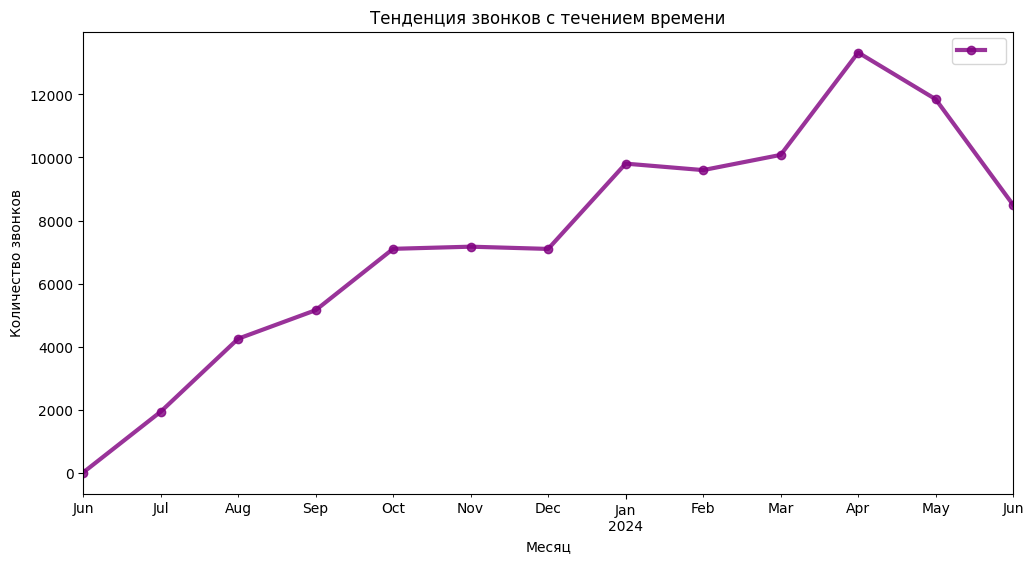

In [98]:
calls_by_month = call.groupby(call['Call Start Time'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
calls_by_month.plot(kind='line', alpha=0.8, label=" ", color ='purple', lw=3, marker='o')
plt.title('Тенденция звонков с течением времени')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [99]:
# merged_call_deals = pd.merge(deals, call, left_on='Contact Name', right_on='CONTACTID', how='left')

# merged_call_deals.head()


# Создаем таблицу для анализа данных по закрытым сделкам и щвонками клиентам из двух таблиц. Строим график зависимости

In [100]:
call['Call Month'] = call['Call Start Time'].dt.to_period('M')
calls_by_month = call.groupby('Call Month').size()

deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')
deals_by_month = deals_filtered.groupby('Deal Month').size()

summary = pd.DataFrame({
    'Deals': deals_by_month,
    'Calls': calls_by_month
}).fillna(0).astype(int)

print(summary)

         Deals  Calls
2023-06      0      7
2023-07    198   1935
2023-08    428   4251
2023-09    449   5156
2023-10    916   7102
2023-11    906   7170
2023-12    689   7099
2024-01    834   9804
2024-02    812   9599
2024-03   1010  10081
2024-04   1602  13328
2024-05   1307  11847
2024-06    744   8495
2024-12      1      0


<ipython-input-100-8b280e3be7c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')


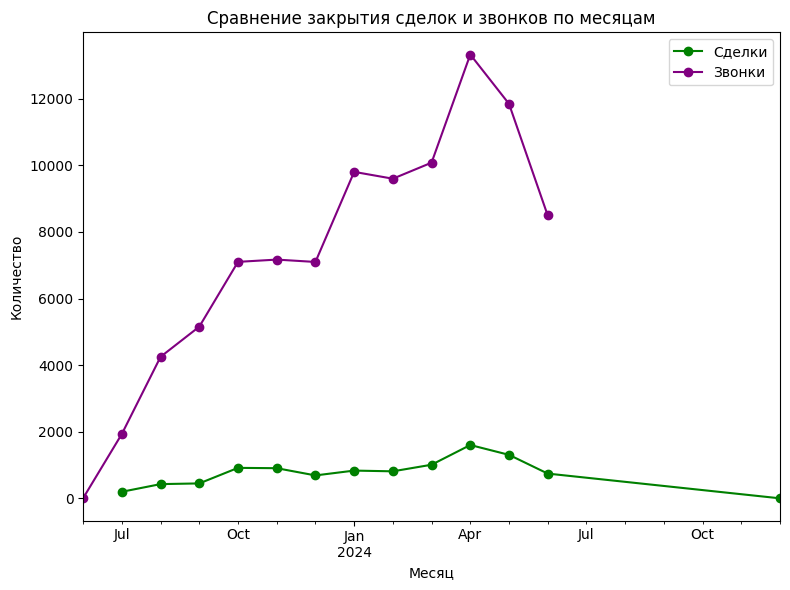

In [101]:
plt.figure(figsize=(8, 6))

# Сделки
deals_by_month.plot(kind='line', color='green', label='Сделки', marker='o')

# Звонки
calls_by_month.plot(kind='line', color='purple', label='Звонки', marker='o')

plt.title('Сравнение закрытия сделок и звонков по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [102]:
deals['Created Month'] = deals['Created Time'].dt.to_period('M')
created_by_month = deals.groupby('Created Month').size()

deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')
closed_by_month = deals_filtered.groupby('Deal Month').size()

summary = pd.DataFrame({
    'Created': created_by_month,
    'Closed': closed_by_month
}).fillna(0).astype(int)
summary = summary[(summary['Created'] != 0)]
print(summary)

         Created  Closed
2023-07      380     198
2023-08      685     428
2023-09      763     449
2023-10     1098     916
2023-11     1057     906
2023-12     1140     689
2024-01     1442     834
2024-02     1061     812
2024-03     1511    1010
2024-04     2104    1602
2024-05     1635    1307
2024-06     1096     744


<ipython-input-102-9025bc38a326>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')


<Figure size 1000x800 with 0 Axes>

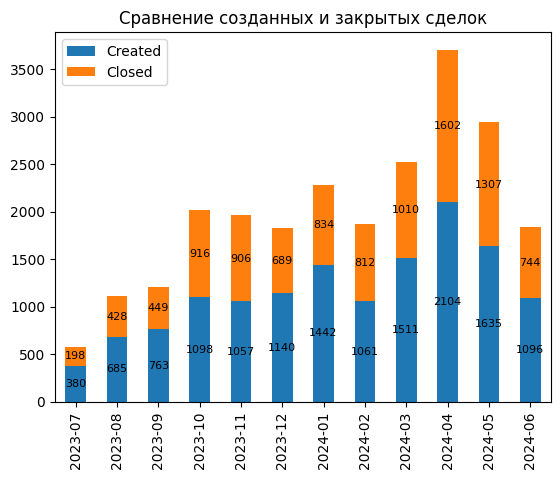

In [103]:
plt.figure(figsize=(10, 8))
summary.plot(kind='bar', stacked=True)


for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', fontsize=8, color='black')

plt.title('Сравнение созданных и закрытых сделок')
plt.show()

<ipython-input-195-c157e49b6517>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')


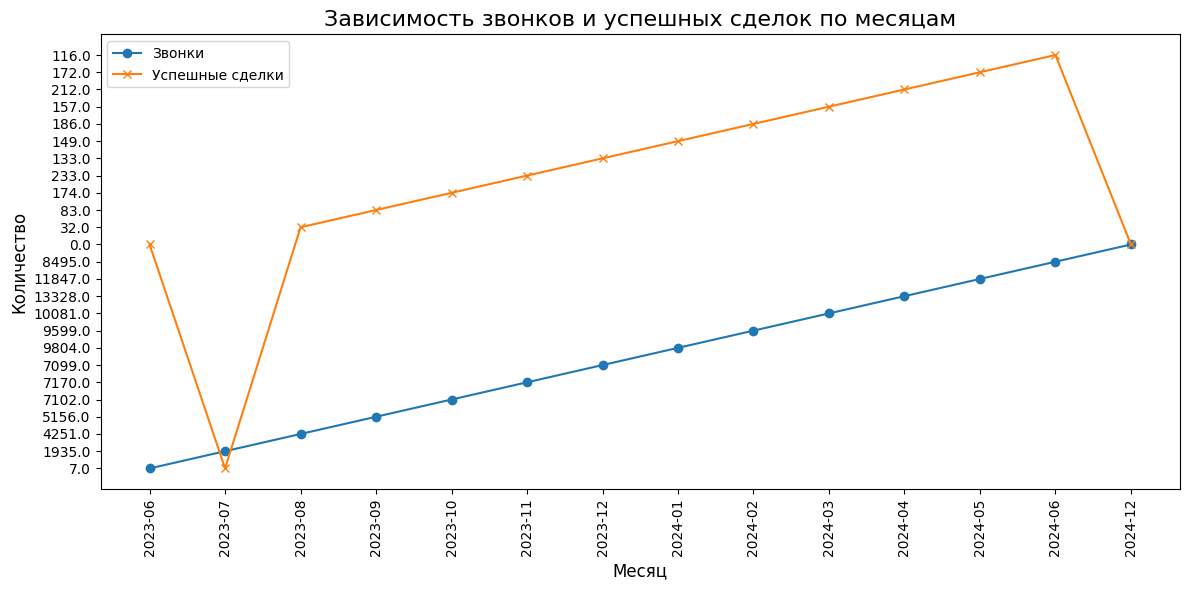

In [195]:
call['Call Start Time'] = pd.to_datetime(call['Call Start Time'])
deals['Closing Date'] = pd.to_datetime(deals['Closing Date'])

deals['Successful'] = (deals['Initial Amount Paid'] > 0).astype(int)


call['Call Month'] = call['Call Start Time'].dt.to_period('M')
calls_by_month = call.groupby('Call Month').size()


deals_filtered = deals[deals['Closing Date'] != pd.to_datetime('2025-01-01')]
deals_filtered['Deal Month'] = deals_filtered['Closing Date'].dt.to_period('M')

deals_by_month = deals_filtered.groupby('Deal Month').agg(
    total_deals=('Deal Month', 'size'),
    successful_deals=('Successful', 'sum'),
    min_closing_date=('Closing Date', 'min'),
    max_closing_date=('Closing Date', 'max')
)

calls_by_month_times = call.groupby('Call Month').agg(
    min_call_time=('Call Start Time', 'min'),
    max_call_time=('Call Start Time', 'max')
)
summary = pd.DataFrame({
    'Calls': calls_by_month,
    'Successful Deals': deals_by_month['successful_deals'],
    'Min Call Time': calls_by_month_times['min_call_time'],
    'Max Call Time': calls_by_month_times['max_call_time'],
    'Min Closing Date': deals_by_month['min_closing_date'],
    'Max Closing Date': deals_by_month['max_closing_date']
}).fillna(0).astype(str)


plt.figure(figsize=(12, 6))
plt.plot(summary.index.astype(str), summary['Calls'], label='Звонки', marker='o')
plt.plot(summary.index.astype(str), summary['Successful Deals'], label='Успешные сделки', marker='x')


plt.title('Зависимость звонков и успешных сделок по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


На графике присутствуют некоторые выбросы, то есть значения, значительно отклоняющиеся от общей тенденции. Например, в июле 2023 года наблюдается резкое снижение количества успешных сделок при относительно стабильном количестве звонков. Это может быть связано с какими-то временными факторами, например, отпуском сотрудников или сезонными колебаниями.

In [196]:
summary

,Calls,Successful Deals,Min Call Time,Max Call Time,Min Closing Date,Max Closing Date
2023-06,7.0,0.0,2023-06-30 00:00:00,2023-06-30 00:00:00,0,0
2023-07,1935.0,7.0,2023-07-03 00:00:00,2023-07-31 00:00:00,2023-07-06 00:00:00,2023-07-31 00:00:00
2023-08,4251.0,32.0,2023-08-01 00:00:00,2023-08-31 00:00:00,2023-08-01 00:00:00,2023-08-31 00:00:00
2023-09,5156.0,83.0,2023-09-01 00:00:00,2023-09-30 00:00:00,2023-09-01 00:00:00,2023-09-30 00:00:00
2023-10,7102.0,174.0,2023-10-01 00:00:00,2023-10-31 00:00:00,2023-10-01 00:00:00,2023-10-31 00:00:00
2023-11,7170.0,233.0,2023-11-01 00:00:00,2023-11-30 00:00:00,2023-11-01 00:00:00,2023-11-30 00:00:00
2023-12,7099.0,133.0,2023-12-01 00:00:00,2023-12-31 00:00:00,2023-12-01 00:00:00,2023-12-31 00:00:00
2024-01,9804.0,149.0,2024-01-01 00:00:00,2024-01-31 00:00:00,2024-01-02 00:00:00,2024-01-31 00:00:00
2024-02,9599.0,186.0,2024-02-01 00:00:00,2024-02-29 00:00:00,2024-02-01 00:00:00,2024-02-29 00:00:00
2024-03,10081.0,157.0,2024-03-01 00:00:00,2024-03-31 00:00:00,2024-03-01 00:00:00,2024-03-31 00:00:00


# **SlA** ХОЧУ ПОСЧИТАТЬ ЗАВИСИМОСТЬ ЗАКРЫТИЯ СДЕЛОК ОТ ВРЕМЕНИ РЕАКЦИИ НА ЗАЯВКУ. СЧИТАЮ ВРЕМЯ отклика и сравниваю с SLA.
Также смотрю успешность сделки в зависимости от SLA

Боксплот демонстрирует, что соблюдение SLA существенно влияет на время отклика

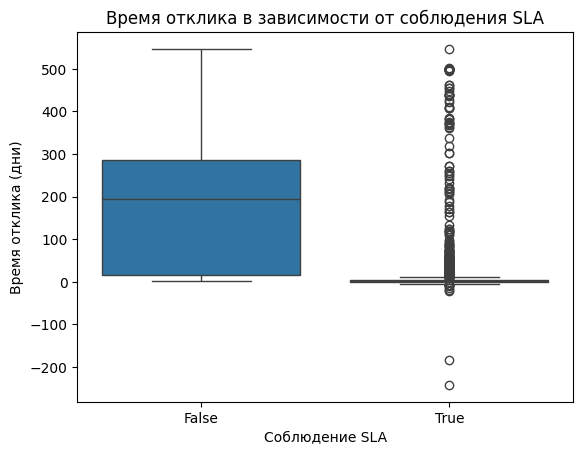

In [175]:
deals['Response Time'] = (deals['Closing Date'] - deals['Created Time']).dt.days
deals['Response Within SLA'] = deals['Response Time'] <= deals['SLA']

sns.boxplot(data=deals, x='Response Within SLA', y='Response Time')
plt.title('Время отклика в зависимости от соблюдения SLA')
plt.xlabel('Соблюдение SLA')
plt.ylabel('Время отклика (дни)')
plt.show()

In [176]:
response_time_summary = deals.groupby('Response Within SLA')['Response Time'].mean()
response_time_summary

,Response Time
Response Within SLA,
False,168.239157
True,8.250854


In [177]:
successful_summary = deals.groupby(['Response Within SLA', 'Is Successful'])['Response Time'].mean()
successful_summary

Response Within SLA  Is Successful
False                False            149.777943
                     True             204.480832
True                 False              5.655832
                     True              37.851695
Name: Response Time, dtype: float64

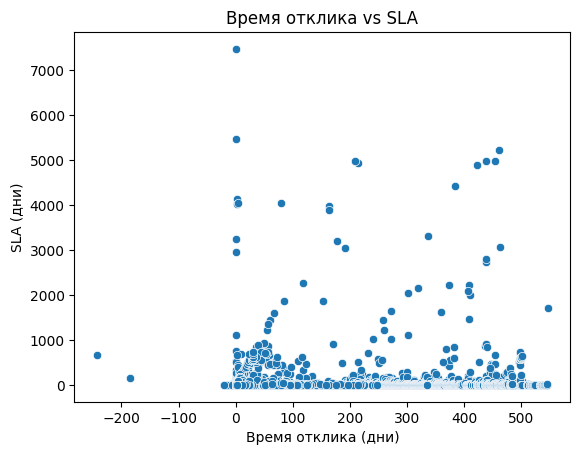

In [179]:
# True - время отклика уложилось в SLA, сделка успешна
sns.scatterplot(data=deals, x='Response Time', y='SLA')
plt.title('Время отклика vs SLA')
plt.xlabel('Время отклика (дни)')
plt.ylabel('SLA (дни)')
plt.show()

Слабая связь между временем отклика и SLA. Никакой линейной зависимости

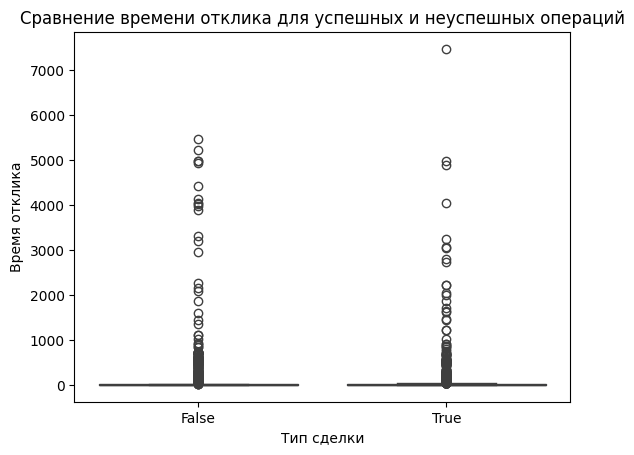

In [183]:
sns.boxplot(x='Is Successful', y='SLA', data=deals)
plt.xlabel('Тип сделки')
plt.ylabel('Время отклика')
plt.title('Сравнение времени отклика для успешных и неуспешных операций')
plt.show()

нет особой зависимости. и даже коллеряция очцень низкая

In [178]:
correlation_sla_response_time = deals[['Response Time', 'SLA']].corr().iloc[0, 1]
print(f'Корреляция между временем отклика и SLA: {correlation_sla_response_time}')

Корреляция между временем отклика и SLA: 0.05550484556700883


# **2. РАБОТА С ТАБЛИЦАМИ SPENT И DEALS. ГРУППИРОВКА ПО ИСТОЧНИКУ РК.**

создала доп столбец успещности сделки

In [211]:
deals['Is Successful'] = (deals['Initial Amount Paid'] > 0)
deals_grouped = deals.groupby(['Source']).agg({
    'Contact Name': 'count',
    'Campaign': 'count',
    'Offer Total Amount': 'sum',
    'Initial Amount Paid': 'sum',
    'Is Successful': 'sum'
})

In [105]:
deals.head()

,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,SLA,Source,Payment Type,Product,...,Course duration,Months of study_deals,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Quality2,Created Month,Is Successful
0,5805028000007843060,Ulysses Adams,2025-01-01,Payment Done,No reason,04.07.23recentlymoved_DE,0.016667,Facebook Ads,Recurring Payments,Digital Marketing,...,11,6.0,1500.0,11960.0,5805028000007854069,Unknown,Unknown,Medium,2023-09,True
1,5805028000007754120,Cara Iverson,2023-11-12,Payment Done,No reason,work_DE,13.890278,Telegram posts,Recurring Payments,Digital Marketing,...,11,6.0,1500.0,11960.0,5805028000007742068,Unknown,Unknown,Low,2023-09,True
2,5805028000007744074,Jane Smith,2023-10-18,Payment Done,No reason,work_DE,0.543333,Telegram posts,Recurring Payments,Digital Marketing,...,11,6.0,1500.0,11960.0,5805028000007761132,Unknown,Unknown,Low,2023-09,True
3,5805028000007647107,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,5.526111,Youtube Ads,Recurring Payments,Digital Marketing,...,11,6.0,1500.0,11960.0,5805028000007649089,Unknown,Unknown,Medium,2023-09,True
4,5805028000007623014,Jane Smith,2023-09-14,Payment Done,No reason,youtube_shorts_DE,2.800833,Youtube Ads,Recurring Payments,Digital Marketing,...,11,6.0,1500.0,11960.0,5805028000007595085,Unknown,Unknown,Non Target,2023-09,True


In [212]:
spent_grouped = spent.groupby(['Source']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [219]:
campaign_summary = pd.merge(deals_grouped, spent_grouped, on=['Source'], how='inner').reset_index()
campaign_summary.head()

,Source,Contact Name,Campaign,Offer Total Amount,Initial Amount Paid,Is Successful,Impressions,Clicks,Spend
0,Bloggers,716,716,1630500.0,186300.0,166,411029,10163,13439.00
1,Facebook Ads,3877,3877,8352166.0,907358.0,847,2850200,48133,33754.72
2,Google Ads,3670,3670,5861040.0,728248.0,628,32752333,248487,57798.60
3,SMM,625,625,2907060.0,430930.0,321,23772,1824,7269.52
4,Telegram posts,828,828,1635575.0,225048.0,164,556077,13496,6860.36


In [220]:
campaign_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Source               9 non-null      object 
 1   Contact Name         9 non-null      Int64  
 2   Campaign             9 non-null      int64  
 3   Offer Total Amount   9 non-null      float64
 4   Initial Amount Paid  9 non-null      float64
 5   Is Successful        9 non-null      int64  
 6   Impressions          9 non-null      int64  
 7   Clicks               9 non-null      int64  
 8   Spend                9 non-null      float64
dtypes: Int64(1), float64(3), int64(4), object(1)
memory usage: 785.0+ bytes


# **Сгруппировала по источникам и посчитала количество сделок**

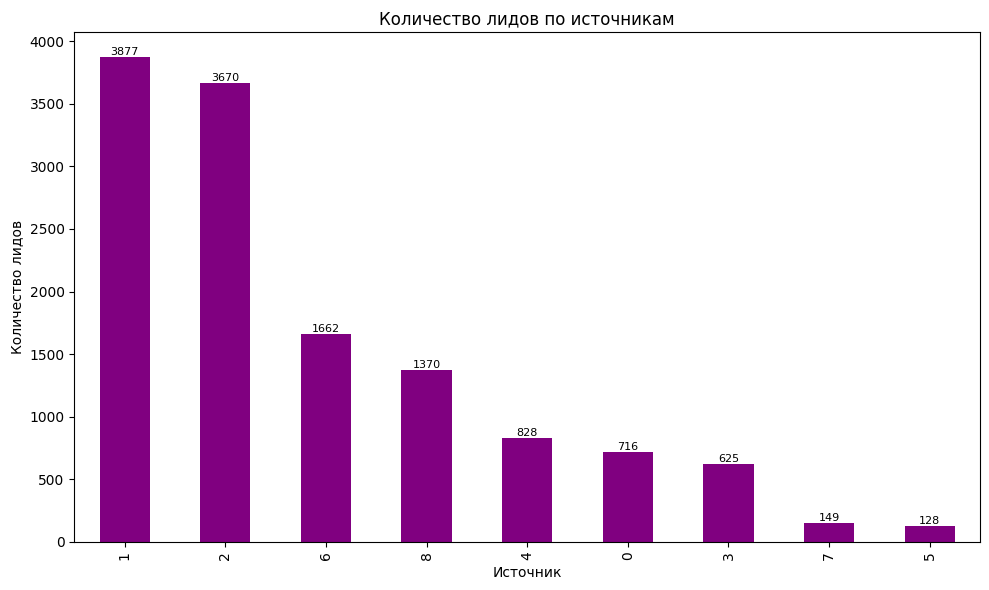

In [221]:
campaign_summary_sorted = campaign_summary.sort_values(by='Contact Name', ascending=False)
campaign_summary_sorted['Contact Name'].plot(kind='bar', figsize=(10, 6), color='purple')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black')

plt.title('Количество лидов по источникам')
plt.xlabel('Источник')
plt.ylabel('Количество лидов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

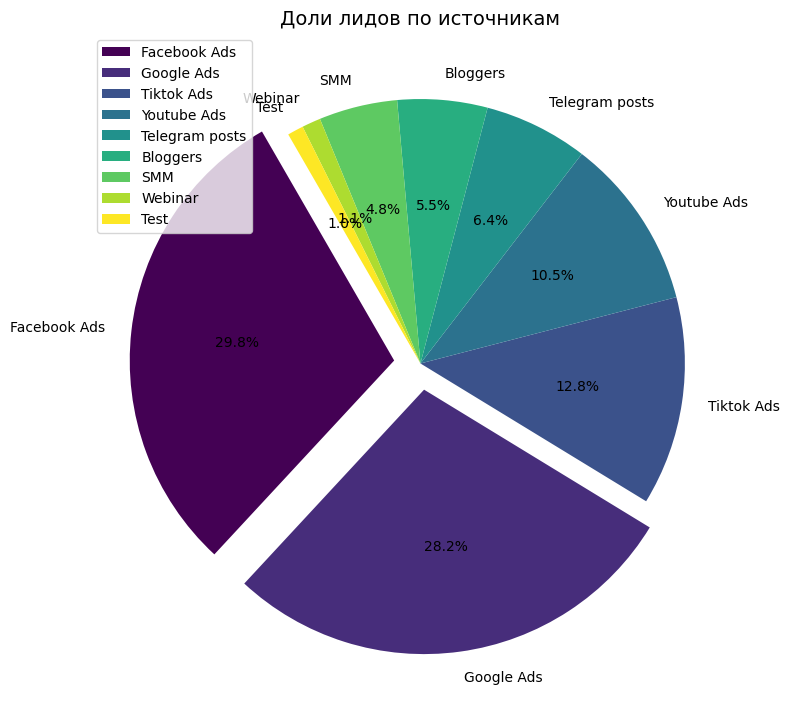

In [227]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0, 0,0,0,0,0,0)
campaign_summary_sorted.set_index('Source')['Contact Name'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=120,
    cmap='viridis',
    legend=True,
    explode=explode
)

plt.title('Доли лидов по источникам рекламы', fontsize=14)
plt.ylabel('')
plt.tight_layout()

# Показать диаграмму
plt.show()

In [110]:
deals_grouped_by_campaign = deals.groupby(['Campaign']).agg({
    'Contact Name': 'count',  # Количество сделок
    'Is Successful': 'sum'
})

In [111]:
spent_grouped_by_campaign = spent.groupby(['Campaign']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [112]:
campaign_summary_by_campaign = pd.merge(deals_grouped_by_campaign, spent_grouped_by_campaign, on=['Campaign'], how='inner').reset_index()
campaign_summary_by_campaign.head()

,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend
0,01.04.23women_PL,29,0,45956,367,357.25
1,02.05.24test_DE,115,7,20047,790,164.04
2,02.07.23wide_DE,827,178,594807,10281,6913.60
3,02.08.23interests_DE,5,0,5990,76,69.30
4,03.07.23women,514,113,348089,7139,4219.75


In [113]:
campaign_summary_by_campaign['CTR'] = (campaign_summary_by_campaign['Clicks'] / campaign_summary_by_campaign['Impressions']) * 100
campaign_summary_by_campaign['CR'] = (campaign_summary_by_campaign['Is Successful'] / campaign_summary_by_campaign['Clicks']) * 100

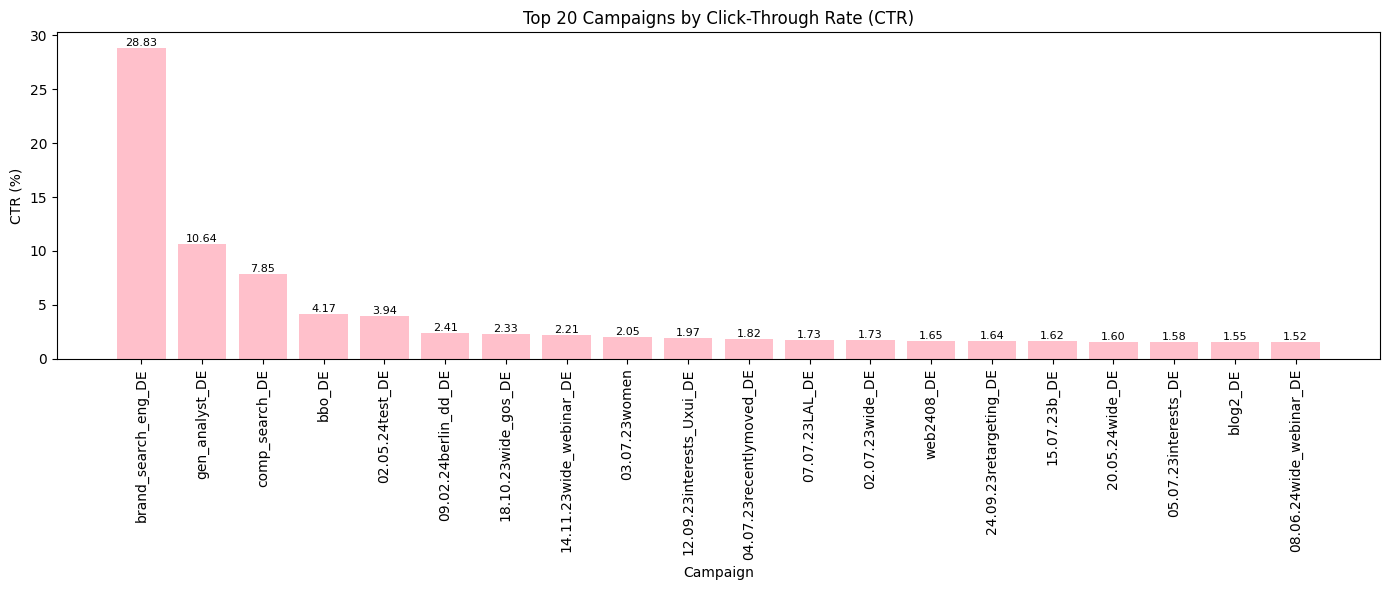

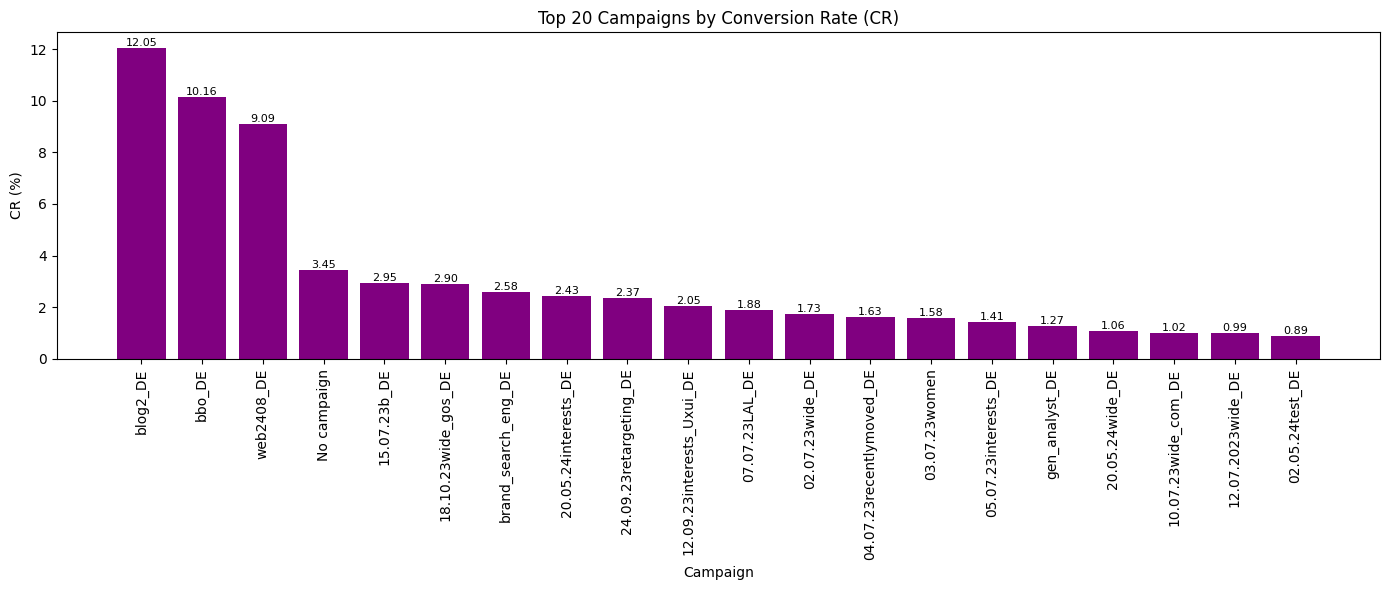

In [114]:
campaign_summary_by_campaign_sorted_ctr = campaign_summary_by_campaign.sort_values(by='CTR', ascending=False)
campaign_summary_by_campaign_sorted_cr = campaign_summary_by_campaign.sort_values(by='CR', ascending=False)

filter = campaign_summary_by_campaign_sorted_ctr['Campaign'] != 'No campaign'
campaign_summary_by_campaign_sorted_ctr = campaign_summary_by_campaign_sorted_ctr[filter]
top_20_ctr = campaign_summary_by_campaign_sorted_ctr.head(20)


plt.figure(figsize=(14, 6))
bars_ctr = plt.bar(top_20_ctr['Campaign'], top_20_ctr['CTR'], color='pink')
plt.title('Top 20 Campaigns by Click-Through Rate (CTR)')
plt.xlabel('Campaign')
plt.ylabel('CTR (%)')
plt.xticks(rotation=90)
plt.tight_layout()

# Добавление подписей для CTR с использованием контейнера
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black', fmt="%.2f")

plt.show()

# Топ-20 кампаний по CR
top_20_cr = campaign_summary_by_campaign_sorted_cr.head(20)

# График для CR
plt.figure(figsize=(14, 6))
bars_cr = plt.bar(top_20_cr['Campaign'], top_20_cr['CR'], color='purple')
plt.title('Top 20 Campaigns by Conversion Rate (CR)')
plt.xlabel('Campaign')
plt.ylabel('CR (%)')
plt.xticks(rotation=90)
plt.tight_layout()

# Добавление подписей для CR с использованием контейнера
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black', fmt="%.2f")

plt.show()

In [115]:
deals_source_grouped = deals.groupby(['Source', 'Campaign']).agg({
    'Contact Name': 'count',  # Количество сделок
    'Is Successful': 'sum'}
                                                                 )

# **Создаю группировку Ресурс и кампания и в графиках показываю СTR , CR**

In [116]:
spent_sourse_grouped = spent.groupby(['Source', 'Campaign']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

In [117]:
cam_source_summary = pd.merge(deals_source_grouped, spent_sourse_grouped, on=['Source', 'Campaign'], how='inner')
cam_source_summary.reset_index(inplace=True)
cam_source_summary = cam_source_summary.fillna(0)
cam_source_summary. tail()

,Source,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend
43,Webinar,bbo_DE,6,4,3069,128,200.00
44,Webinar,web2408_DE,9,6,9315,154,189.04
45,Youtube Ads,shorts_PL,3,0,89763,685,234.83
46,Youtube Ads,youtube_shorts_DE,1354,217,8481054,57873,14149.22
47,Youtube Ads,youtube_shortsin_AT,13,0,85161,503,249.28


In [118]:
cam_source_summary['CTR'] = (cam_source_summary['Clicks'] / cam_source_summary['Impressions']) * 100
cam_source_summary['CR'] = (cam_source_summary['Is Successful'] / cam_source_summary['Contact Name']) * 100
cam_source_summary['CTR'] = cam_source_summary['CTR'].fillna(0)
cam_source_summary['CR'] = cam_source_summary['CR'].fillna(0)



cam_source_summary.head()


,Source,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend,CTR,CR
0,Bloggers,No campaign,52,52,411029,10163,13439.00,2.472575,100.0
1,Facebook Ads,01.04.23women_PL,29,0,45956,367,357.25,0.798590,0.0
2,Facebook Ads,02.07.23wide_DE,827,178,594807,10281,6913.60,1.728460,21.523579
3,Facebook Ads,02.08.23interests_DE,5,0,5990,76,69.30,1.268781,0.0
4,Facebook Ads,03.07.23women,514,113,348089,7139,4219.75,2.050912,21.984436


In [119]:
cam_source_summary.tail()

,Source,Campaign,Contact Name,Is Successful,Impressions,Clicks,Spend,CTR,CR
43,Webinar,bbo_DE,6,4,3069,128,200.00,4.170740,66.666667
44,Webinar,web2408_DE,9,6,9315,154,189.04,1.653247,66.666667
45,Youtube Ads,shorts_PL,3,0,89763,685,234.83,0.763121,0.0
46,Youtube Ads,youtube_shorts_DE,1354,217,8481054,57873,14149.22,0.682380,16.026588
47,Youtube Ads,youtube_shortsin_AT,13,0,85161,503,249.28,0.590646,0.0


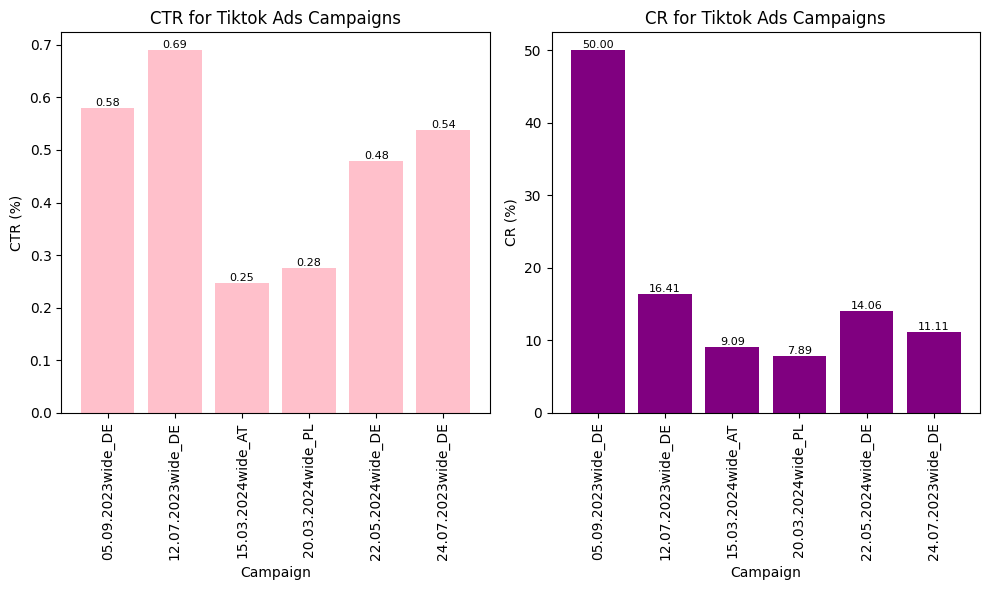

In [120]:
tiktok_data = cam_source_summary[cam_source_summary['Source'] == 'Tiktok Ads']
tiktok_data_filtered = tiktok_data[(tiktok_data['CTR'] > 0) & (tiktok_data['CR'] > 0)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# CTR
bars1 = ax1.bar(tiktok_data_filtered['Campaign'], tiktok_data['CTR'], color='pink')
ax1.bar_label(bars1, label_type='edge', fontsize=8, color='black', fmt="%.2f")

ax1.set_xlabel('Campaign')
ax1.set_ylabel('CTR (%)')
ax1.set_title('CTR for Tiktok Ads Campaigns')
ax1.tick_params(axis='x', rotation=90)

# CR
bars2 = ax2.bar(tiktok_data_filtered['Campaign'], tiktok_data['CR'], color='purple')
ax2.bar_label(bars2, label_type='edge', fontsize=8, color='black', fmt="%.2f")

ax2.set_xlabel('Campaign')
ax2.set_ylabel('CR (%)')
ax2.set_title('CR for Tiktok Ads Campaigns')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

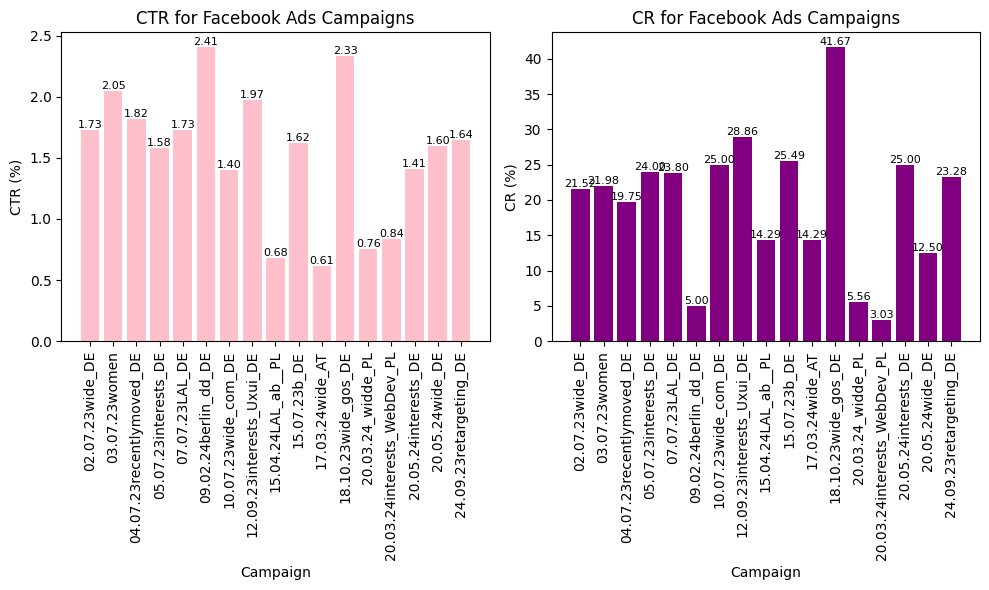

In [121]:
facebook_data = cam_source_summary[cam_source_summary['Source'] == 'Facebook Ads']
fb_data_filtered = facebook_data[(facebook_data['CTR'] > 0) & (facebook_data['CR'] > 0)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


bars1 = ax1.bar(fb_data_filtered['Campaign'], fb_data_filtered['CTR'], color='pink')
ax1.bar_label(bars1, label_type='edge', fontsize=8, color='black', fmt="%.2f")

ax1.set_xlabel('Campaign')
ax1.set_ylabel('CTR (%)')
ax1.set_title('CTR for Facebook Ads Campaigns')
ax1.tick_params(axis='x', rotation=90)

bars2 = ax2.bar(fb_data_filtered['Campaign'], fb_data_filtered['CR'], color='purple')
ax2.bar_label(bars2, label_type='edge', fontsize=8, color='black', fmt="%.2f")

ax2.set_xlabel('Campaign')
ax2.set_ylabel('CR (%)')
ax2.set_title('CR for Facebook Ads Campaigns')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

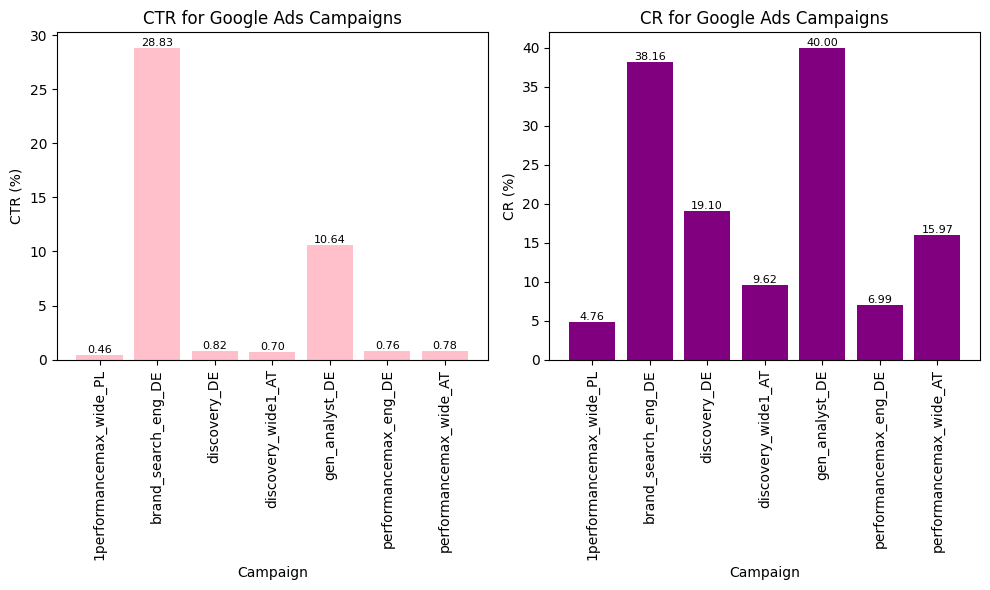

In [122]:
google_data = cam_source_summary[cam_source_summary['Source'] == 'Google Ads']
google_data_filtered = google_data[(google_data['CTR'] > 0) & (google_data['CR'] > 0)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# CTR
bars1 = ax1.bar(google_data_filtered['Campaign'], google_data_filtered['CTR'], color='pink')
ax1.bar_label(bars1, label_type='edge', fontsize=8, color='black', fmt="%.2f")

ax1.set_xlabel('Campaign')
ax1.set_ylabel('CTR (%)')
ax1.set_title('CTR for Google Ads Campaigns')
ax1.tick_params(axis='x', rotation=90)

# CR
bars2 = ax2.bar(google_data_filtered['Campaign'], google_data_filtered['CR'], color='purple')
ax2.bar_label(bars2, label_type='edge', fontsize=8, color='black', fmt="%.2f")

ax2.set_xlabel('Campaign')
ax2.set_ylabel('CR (%)')
ax2.set_title('CR for Google Ads Campaigns')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

СМОТРЮ КАКАЯ ЕСТЬ КОРРЕЛЯЦИЯ МЕЖДУ ВОВЛЕЧЕНИЕМ, кОЛИЧЕСТВОМ КЛИКОВ И ЗАТРАТАМИ

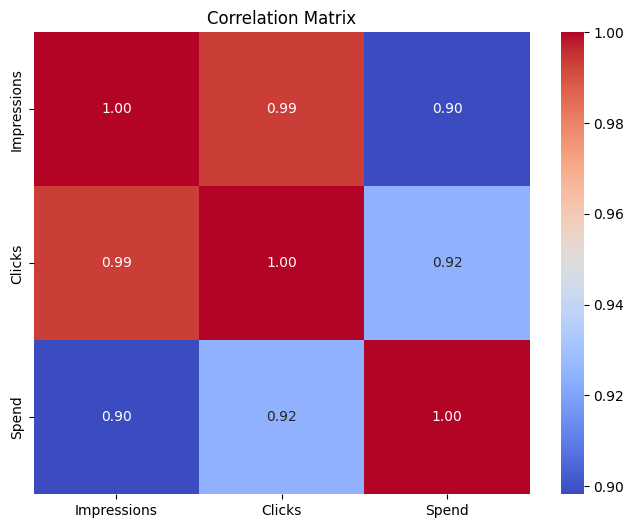

In [123]:
numeric_columns = ['Impressions', 'Clicks', 'Spend']

correlation_matrix = cam_source_summary[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **РАБОТАЮ С ТАБЛИЦЕЙ ДЕАЛС и СПЕНТ И РАССЧИТЫВАЮ ДЛЯ КАЖДОЙ СДЕЛКИ КОНВЕРСИЮ**



In [157]:
filtered_sources = ['Facebook Ads', 'Youtube Ads', 'TikTok Ads']
spent_filtered = spent[spent['Source'].isin(filtered_sources)]
deals_filtered = deals[deals['Source'].isin(filtered_sources)]



In [169]:
deals_cam = deals_filtered.groupby(['Campaign', 'Sourse']).agg({
    'Contact Name': 'count',
    'Is Successful': 'sum',

})

spent_cam = spent_filtered.groupby(['Campaign', 'Sourse']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Spend': 'sum'
})

KeyError: 'Sourse'

In [160]:
campaign = pd.merge(deals_cam, spent_cam, on='Sourse', how='inner')
campaign.head()


,Contact Name,Is Successful,Impressions,Clicks,Spend
Campaign,,,,,
01.04.23women_PL,29,0,45956,367,357.25
02.07.23wide_DE,827,178,594807,10281,6913.60
02.08.23interests_DE,5,0,5990,76,69.30
03.07.23women,514,113,348089,7139,4219.75
04.07.23recentlymoved_DE,628,124,417891,7611,4523.31


In [161]:
campaign['CTR'] = (campaign['Clicks'] / campaign['Impressions']) * 100
campaign['CR'] = (campaign['Is Successful'] / campaign['Contact Name']) * 100
campaign['CTR'] = campaign['CTR'].fillna(0)
campaign['CR'] = campaign['CR'].fillna(0)
campaign['CPC'] = campaign['Spend'] / campaign['Clicks']
campaign['CPL'] = campaign['Spend'] / campaign['Contact Name']
campaign['CPC'] = campaign['CPC'].fillna(0)
campaign['CPL'] = campaign['CPL'].fillna(0)

In [163]:
cam_cr = campaign.groupby(['Sourse'])['CR'].mean().reset_index()
cam_cr.head(100)

,Campaign,CR
0,01.04.23women_PL,0.0
1,02.07.23wide_DE,21.523579
2,02.08.23interests_DE,0.0
3,03.07.23women,21.984436
4,04.07.23recentlymoved_DE,19.745223
5,05.07.23interests_DE,24.0
6,07.07.23LAL_DE,23.799127
7,09.02.24berlin_dd_DE,5.0
8,10.07.23wide_com_DE,25.0
9,12.06.24wide_DE,0.0


In [131]:
campaign['Product'].unique()

array(['Digital Marketing', 'UX/UI Design', 'Web Developer', 'Not chosen'],
      dtype=object)

# **# Считаем эффективность рекламы в пересчете на затраты на лидов**



In [167]:
# Средний CPC по источникам
cpc_by_source = campaign.groupby('Source').agg({'CPC': 'mean'}).reset_index()

# Средний CPL по источникам
cpl_by_source = campaign.groupby('Source').agg({'CPL': 'mean'}).reset_index()

# Средний CPC по продуктам
cpc_by_product = campaign.groupby('Product').agg({'CPC': 'mean'}).reset_index()

# Средний CPL по продуктам
cpl_by_product = campaign.groupby('Product').agg({'CPL': 'mean'}).reset_index()



KeyError: 'Source'

In [133]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887293 entries, 0 to 5887292
Data columns (total 32 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Id                     Int64         
 1   Deal Owner Name        object        
 2   Closing Date           datetime64[ns]
 3   Stage                  object        
 4   Lost Reason            object        
 5   Campaign               object        
 6   SLA                    float64       
 7   Source                 object        
 8   Payment Type           object        
 9   Product                object        
 10  Education Type         object        
 11  Created Time           datetime64[ns]
 12  Course duration        int64         
 13  Months of study_deals  float64       
 14  Initial Amount Paid    float64       
 15  Offer Total Amount     float64       
 16  Contact Name           Int64         
 17  City                   object        
 18  Level of Deutsch      

In [165]:
campaign.isna().sum()

,0
Contact Name,0
Is Successful,0
Impressions,0
Clicks,0
Spend,0
CTR,0
CR,0
CPC,0
CPL,0


In [166]:
campaign['Initial Amount Paid']= campaign['Initial Amount Paid'].fillna(0)
campaign['Offer Total Amount'] = campaign['Offer Total Amount'].fillna(0)

campaign['CPC'] = campaign['CPC'].replace(0, np.nan)
campaign['CPC'] = campaign['CPC'].fillna(0)

campaign['CPL'] = campaign['CPL'].replace(0, np.nan)
campaign['CPL'] = campaign['CPL'].fillna(0)

campaign['CPC'] = campaign['Spend'] / campaign['Clicks']
campaign['CPL'] = campaign['Spend'] / campaign['Contact Name']

KeyError: 'Initial Amount Paid'

# **CPC средняя стоимость за клик , CPL средняя стоимость привлечения лида для Аудитории по источникам рекламы**

** Youtube**

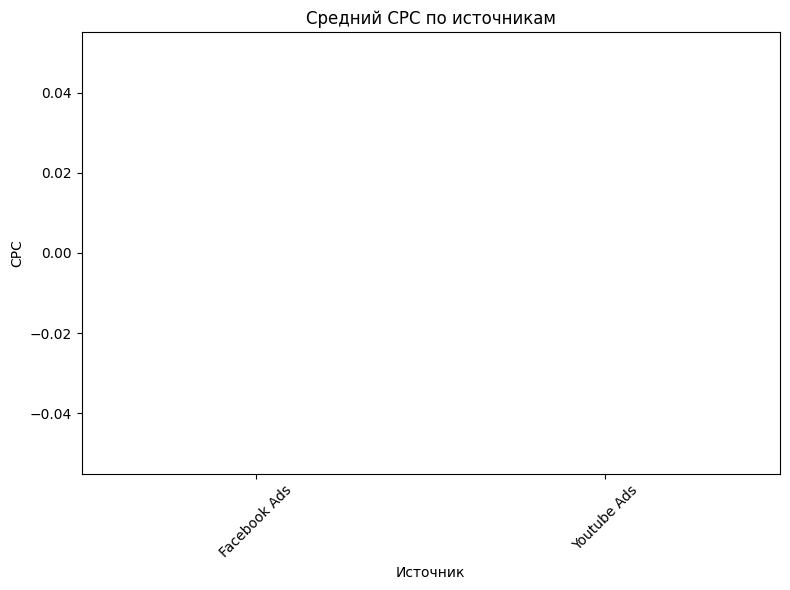

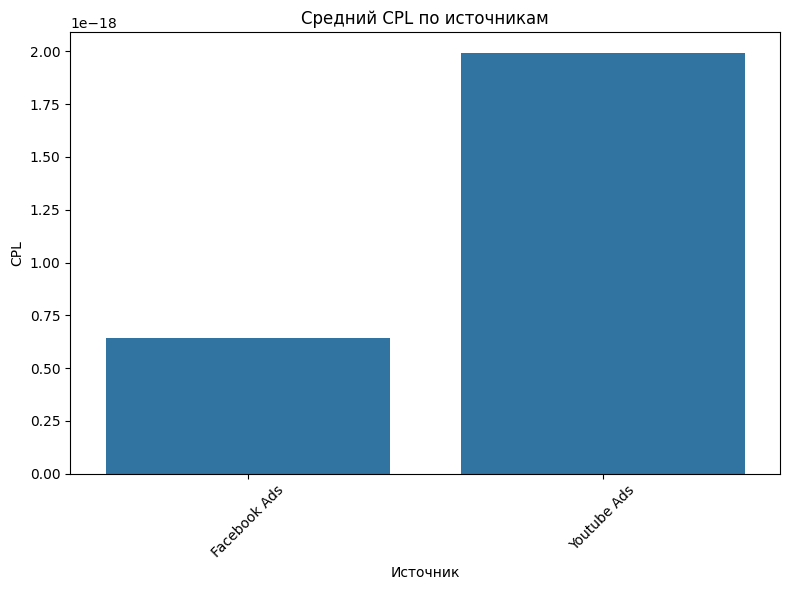

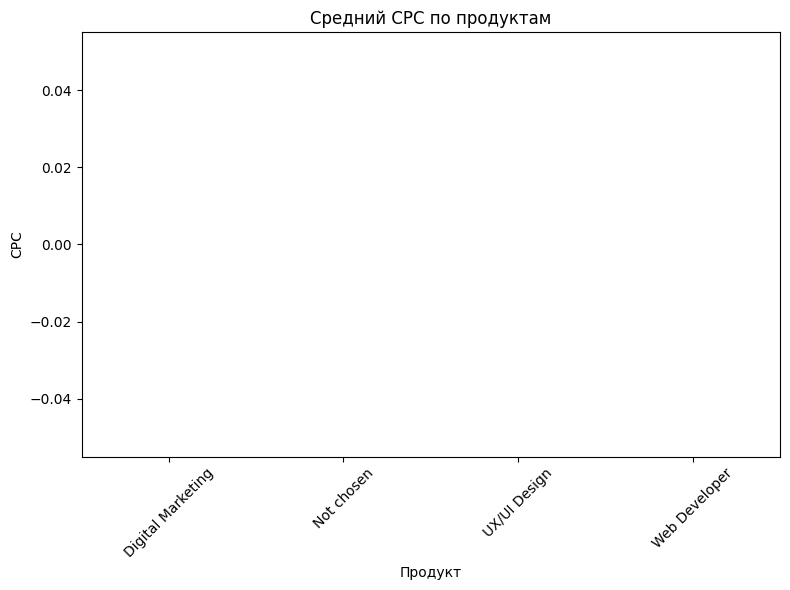

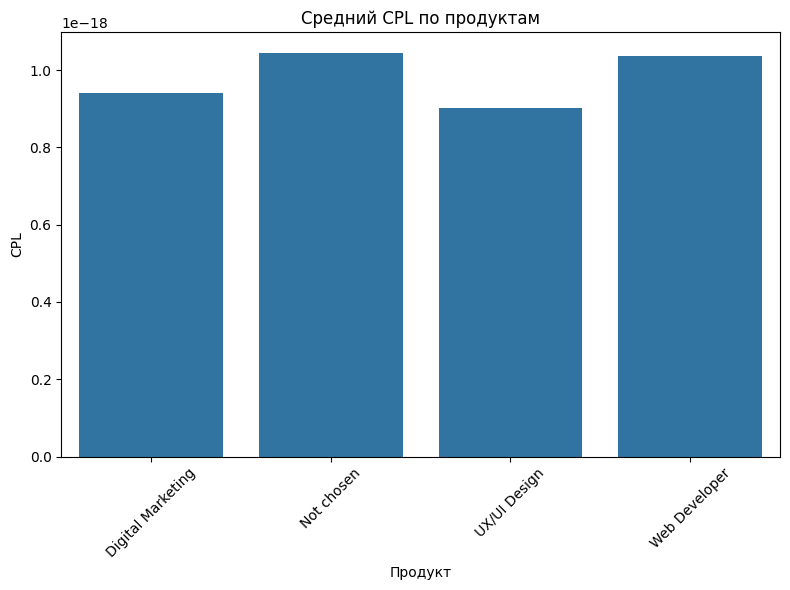

In [164]:
plt.figure(figsize=(8, 6))
sns.barplot(data=cpc_by_source, x='Source', y='CPC', hue='Source')
plt.title('Средний CPC по источникам')
plt.xlabel('Источник')
plt.ylabel('CPC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График CPL по источникам
plt.figure(figsize=(8, 6))
sns.barplot(data=cpl_by_source, x='Source', y='CPL')
plt.title('Средний CPL по источникам')
plt.xlabel('Источник')
plt.ylabel('CPL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График CPC по продуктам
plt.figure(figsize=(8, 6))
sns.barplot(data=cpc_by_product, x='Product', y='CPC')
plt.title('Средний CPC по продуктам')
plt.xlabel('Продукт')
plt.ylabel('CPC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# График CPL по продуктам
plt.figure(figsize=(8, 6))
sns.barplot(data=cpl_by_product, x='Product', y='CPL')
plt.title('Средний CPL по продуктам')
plt.xlabel('Продукт')
plt.ylabel('CPL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Географический анализ:**
1. Проанализируйте географическое распределение сделок по городам.
2. Изучите влияние уровня знания немецкого языка на успешность сделок в разных городах.


In [170]:
deals['Status'] = np.where(deals['Initial Amount Paid'] > 0, 'Successful', 'Unsuccessful')
successful_deals_count = (deals['Status'] == 'Successful').sum()
successful_deals_count

3211

In [171]:
# Группируем данные по уровню языка и статусу сделки
language_success = deals.groupby(['City', 'Level of Deutsch', 'Status']).size().reset_index(name='Deal Count')
language_success

,City,Level of Deutsch,Status,Deal Count
0,Aachen,B1,Successful,5
1,Aachen,Unknown,Successful,4
2,Aalen,Unknown,Successful,1
3,Abensberg,Unknown,Successful,1
4,Achberg,Unknown,Successful,1
...,...,...,...,...
1090,Zwingenberg,Unknown,Successful,1
1091,Öhringen,Unknown,Successful,1
1092,Übelbach,Unknown,Successful,1
1093,Überlingen,Unknown,Unsuccessful,1


TOP 20 городов с успешными сделками по языку

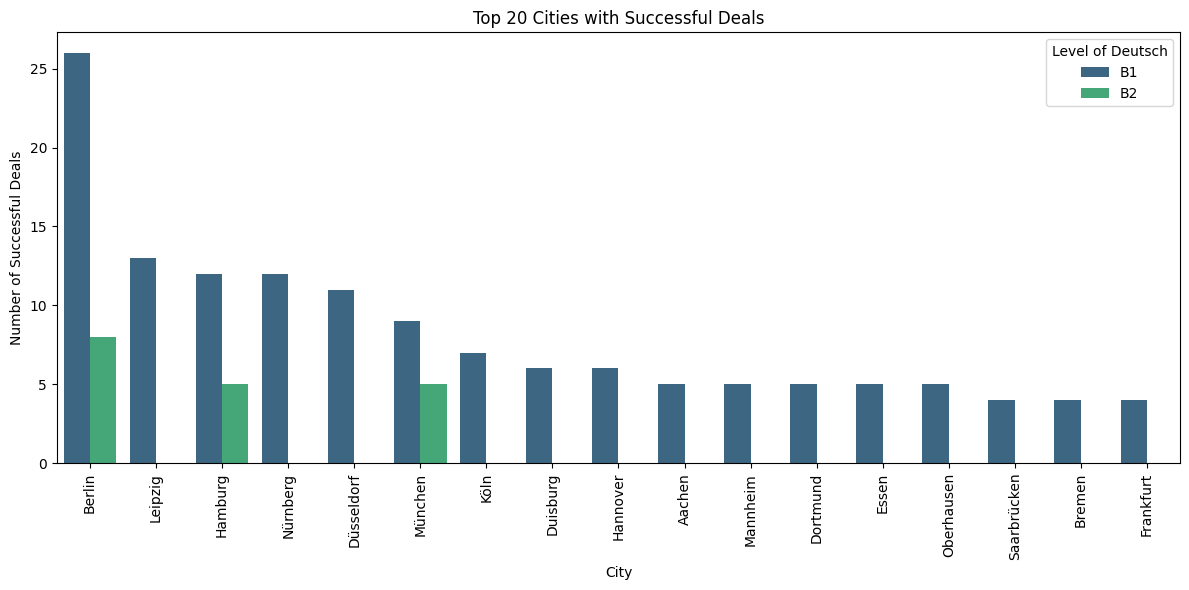

In [172]:
successful_deals = language_success[(language_success['Status'] == 'Successful') & (language_success['City'] != 'Unknown')  & (language_success['Level of Deutsch'] != 'Unknown')  ]
successful_deals = successful_deals.sort_values(by='Deal Count', ascending=False)
top_successful_deals = successful_deals.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals, palette='viridis', hue='Level of Deutsch')

plt.title('Top 20 Cities with Successful Deals')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# НА ВСЯКИЙ СЛУЧАЙ ПОСТРОИЛА СКАТТЕРПЛОТ ПО РАСПРЕДЕЛЕНИЮ КЛИЕНТОВ, ОПЛАТИВШИХ (УСПЕШНЫЕ СДЕЛКИ)

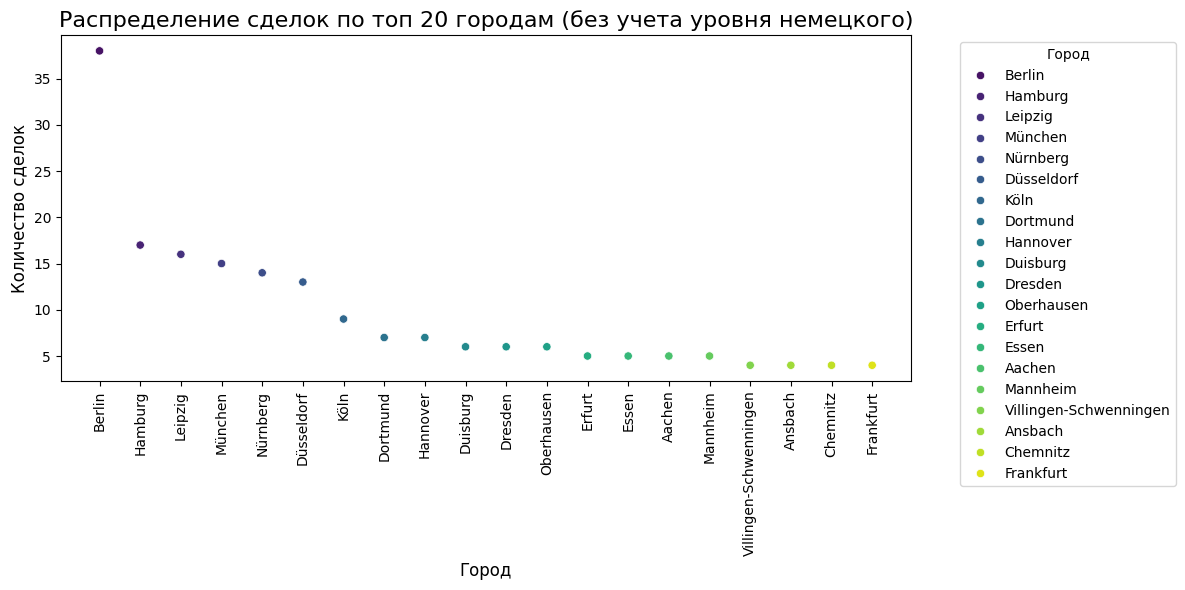

In [140]:
city_deals_count = language_success[(language_success['City'] != 'Unknown') & (language_success['Level of Deutsch'] != 'Unknown')]

# Игнор уровень немецкого языка
city_deals_count = city_deals_count.groupby('City').agg({'Deal Count': 'sum'}).reset_index()
top_city_deals = city_deals_count.sort_values(by='Deal Count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_city_deals, x='City', y='Deal Count', hue='City', palette='viridis')
plt.title('Распределение сделок по топ 20 городам (без учета уровня немецкого)', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество сделок', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

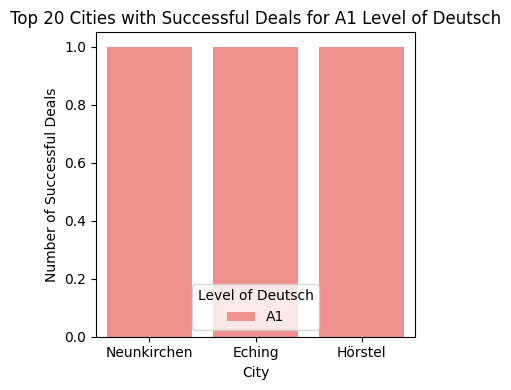

In [141]:
successful_deals_A1 = successful_deals[successful_deals['Level of Deutsch'] == 'A1']
successful_deals_A1 = successful_deals_A1.sort_values(by='Deal Count', ascending=False)
top_successful_deals_A1 = successful_deals_A1.head(20)

# Строим график для уровня A1
plt.figure(figsize=(4, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_A1, palette='spring', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for A1 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

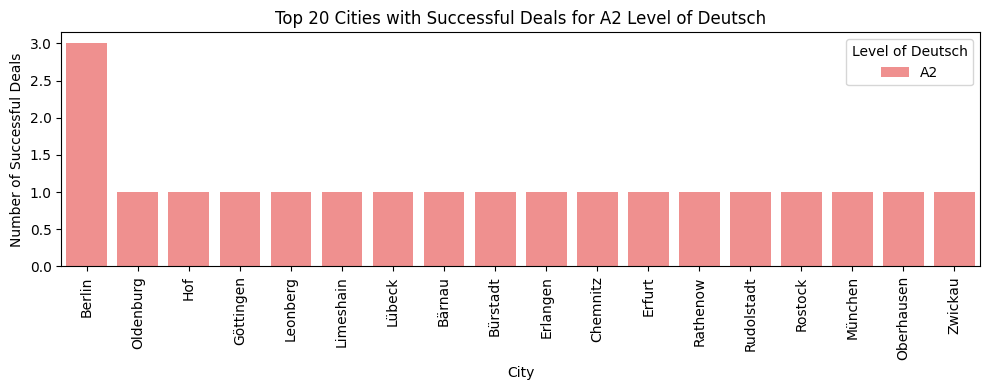

In [142]:
successful_deals_A2 = successful_deals[successful_deals['Level of Deutsch'] == 'A2']
successful_deals_A2 = successful_deals_A2.sort_values(by='Deal Count', ascending=False)
top_successful_deals_A2 = successful_deals_A2.head(20)

# Строим график для уровня A2
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_A2, palette='spring', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for A2 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

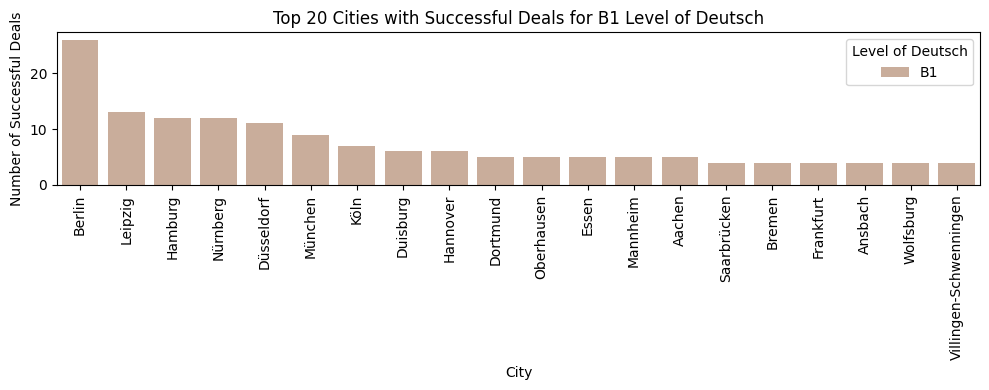

In [143]:
successful_deals_B1 = successful_deals[successful_deals['Level of Deutsch'] == 'B1']
successful_deals_B1 = successful_deals_B1.sort_values(by='Deal Count', ascending=False)
top_successful_deals_B1 = successful_deals_B1.head(20)

# Строим график для уровня B1
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_B1, palette='pink', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for B1 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

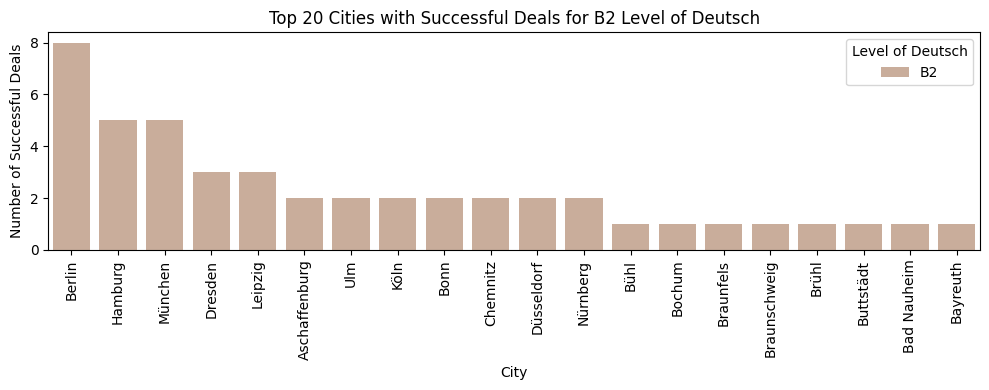

In [144]:
successful_deals_B2 = successful_deals[successful_deals['Level of Deutsch'] == 'B2']
successful_deals_B2 = successful_deals_B2.sort_values(by='Deal Count', ascending=False)
top_successful_deals_B2 = successful_deals_B2.head(20)

# Строим график для уровня B2
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_B2, palette='pink', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for B2 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

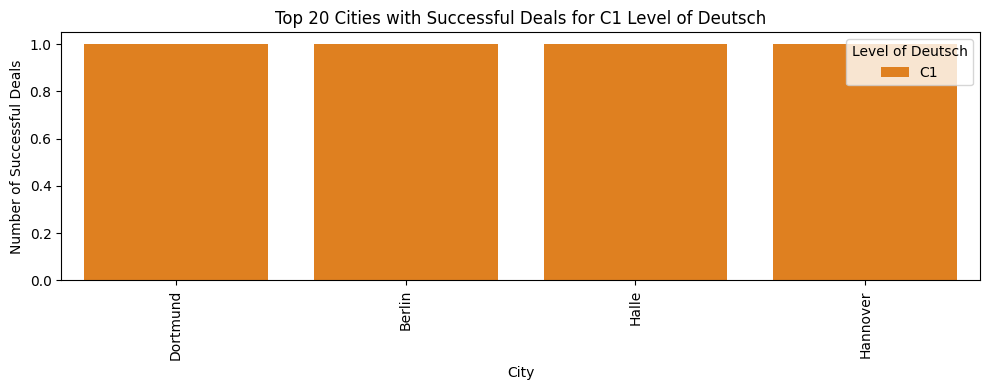

In [145]:
successful_deals_C1 = successful_deals[successful_deals['Level of Deutsch'] == 'C1']
successful_deals_C1 = successful_deals_C1.sort_values(by='Deal Count', ascending=False)
top_successful_deals_C1 = successful_deals_C1.head(20)

# Строим график для уровня C1
plt.figure(figsize=(10, 4))
sns.barplot(x='City', y='Deal Count', data=top_successful_deals_C1, palette='autumn', hue='Level of Deutsch' )
plt.title('Top 20 Cities with Successful Deals for C1 Level of Deutsch')
plt.xlabel('City')
plt.ylabel('Number of Successful Deals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [146]:
language_success_pivot = language_success.pivot_table(index='Level of Deutsch', columns='Status', values='Deal Count', aggfunc='sum')
language_success_pivot

Status,Successful,Unsuccessful
Level of Deutsch,,
A1,4.0,NaN
A2,22.0,1.0
B1,509.0,6.0
B2,112.0,NaN
C1,4.0,NaN
C2,1.0,NaN
Unknown,2559.0,10754.0


# **3. Анализ эффективности работы отдела продаж:**

# Оцените эффективность отдельных владельцев сделок и рекламных кампаний с точки зрения количества обработанных сделок, коэффициента конверсии и
общей суммы продаж.


In [147]:
print(deals['Status'].value_counts())

Status
Unsuccessful    10761
Successful       3211
Name: count, dtype: int64


In [173]:
deals['Is Successful'] = deals['Status'] == 'Successful'

owner_campaigns = deals.groupby(['Deal Owner Name']).agg(
    total_deals=('Status', 'count'),
    successful_deals=('Is Successful', 'sum'),
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
).reset_index()

owner_campaigns['conversion_rate'] = owner_campaigns['successful_deals'] / owner_campaigns['total_deals']
owner_campaigns.head(100)

,Deal Owner Name,total_deals,successful_deals,total_sales,total_offer_amount,conversion_rate
0,Alice Johnson,15,0,0.0,0.0,0.000000
1,Amy Green,25,0,0.0,0.0,0.000000
2,Ben Hall,998,241,236840.0,2101220.0,0.241483
3,Bob Brown,137,2,950.0,7800.0,0.014599
4,Cara Iverson,809,103,686800.0,950080.0,0.127318
5,Charlie Davis,1856,424,429370.0,3896648.0,0.228448
6,Diana Evans,595,53,50450.0,585000.0,0.089076
7,Eva Kent,351,62,65100.0,576340.0,0.176638
8,George King,66,4,2900.0,33280.0,0.060606
9,Ian Miller,302,30,29670.0,277020.0,0.099338


In [174]:
owner_campaigns['total_offer_amount'] = owner_campaigns['total_offer_amount'].astype(int)
owner_campaigns['total_sales'] = owner_campaigns['total_sales'].astype(int)

# **УСПЕШНОСТЬ ПО КОЛ-ВУ СДЕЛОК ПО КАЖДОМУ МЕНЕДЖЕРУ**

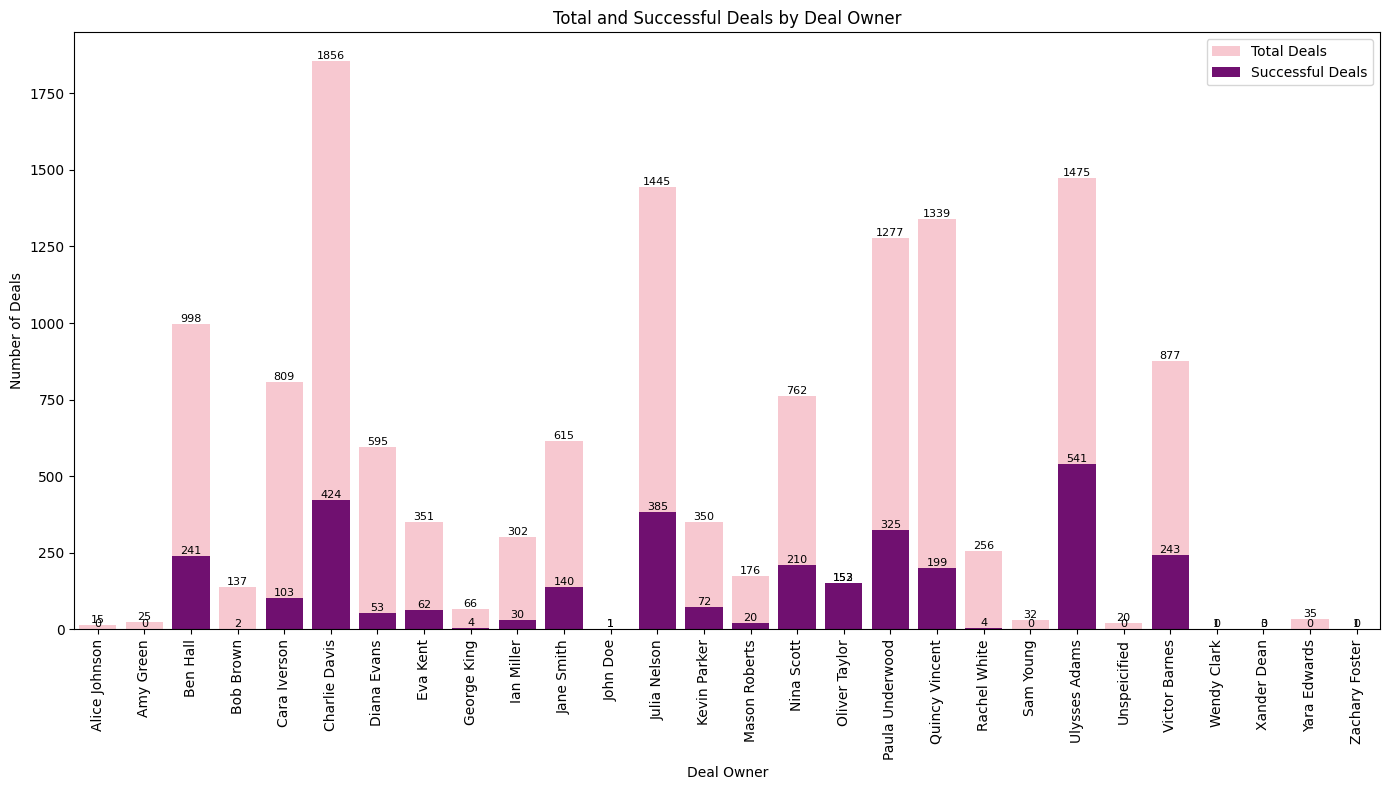

In [150]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Deal Owner Name', y='total_deals', data=owner_campaigns, color='pink', label='Total Deals')
sns.barplot(x='Deal Owner Name', y='successful_deals', data=owner_campaigns, color='purple', label='Successful Deals')

for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black')

plt.title('Total and Successful Deals by Deal Owner')
plt.xlabel('Deal Owner')
plt.ylabel('Number of Deals')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

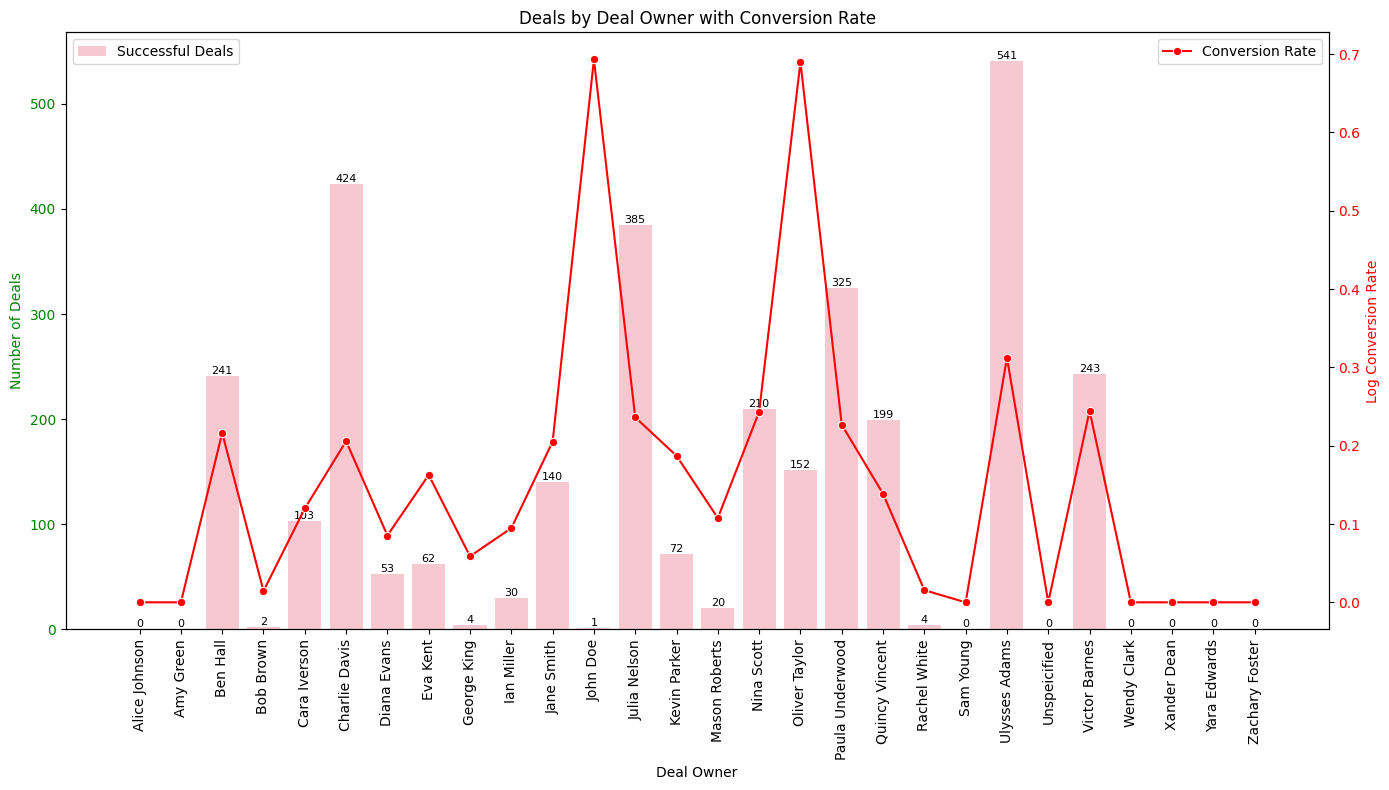

In [151]:
owner_campaigns['log_conversion_rate'] = np.log(owner_campaigns['conversion_rate'] + 1) # Логарифмирую и добавляю 1, чтобы избежать деления на ноль
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(x='Deal Owner Name', y='successful_deals', data=owner_campaigns, color='pink', label='Successful Deals')

ax2 = ax1.twinx()
sns.lineplot(x='Deal Owner Name', y='log_conversion_rate', data=owner_campaigns, marker='o', color='red', label='Conversion Rate')

for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=8, color='black')

ax2.set_ylabel('Log Conversion Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Заголовок и подписи
ax1.set_title('Deals by Deal Owner with Conversion Rate')
ax1.set_xlabel('Deal Owner')
ax1.set_ylabel('Number of Deals')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Number of Deals', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Добавляем легенду loc определяет место легенды
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

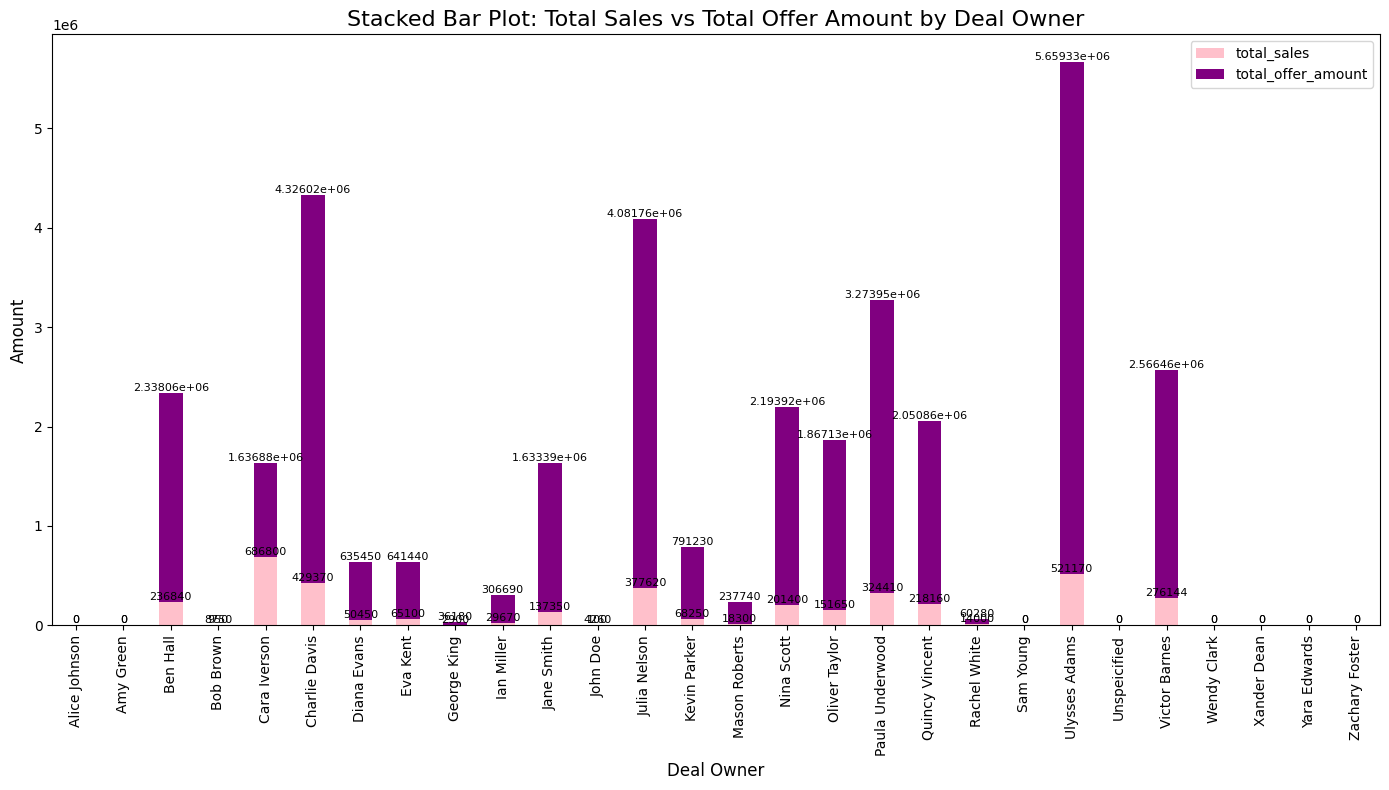

In [152]:
plt.figure(figsize=(14, 8))

# Построение стековой столбчатой диаграммы
owner_campaigns.plot(kind='bar', x='Deal Owner Name', y=['total_sales', 'total_offer_amount'],
                     stacked=True, color=['pink', 'purple'], figsize=(14, 8))

# Добавление подписей для каждого сегмента
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', fontsize=8, color='black')

# Настройка графика
plt.title('Stacked Bar Plot: Total Sales vs Total Offer Amount by Deal Owner', fontsize=16)
plt.xlabel('Deal Owner', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='')

plt.tight_layout()
plt.show()

Хитмеп, который отображает причины отказа по каждому менеджеру. Здесь можно увидеть, что наибольшее кол-во отказов указано, как Нет ответа, что говорит об отсутствии проведения треннингов по заполнению CRM и невозможности провести анализ качественно

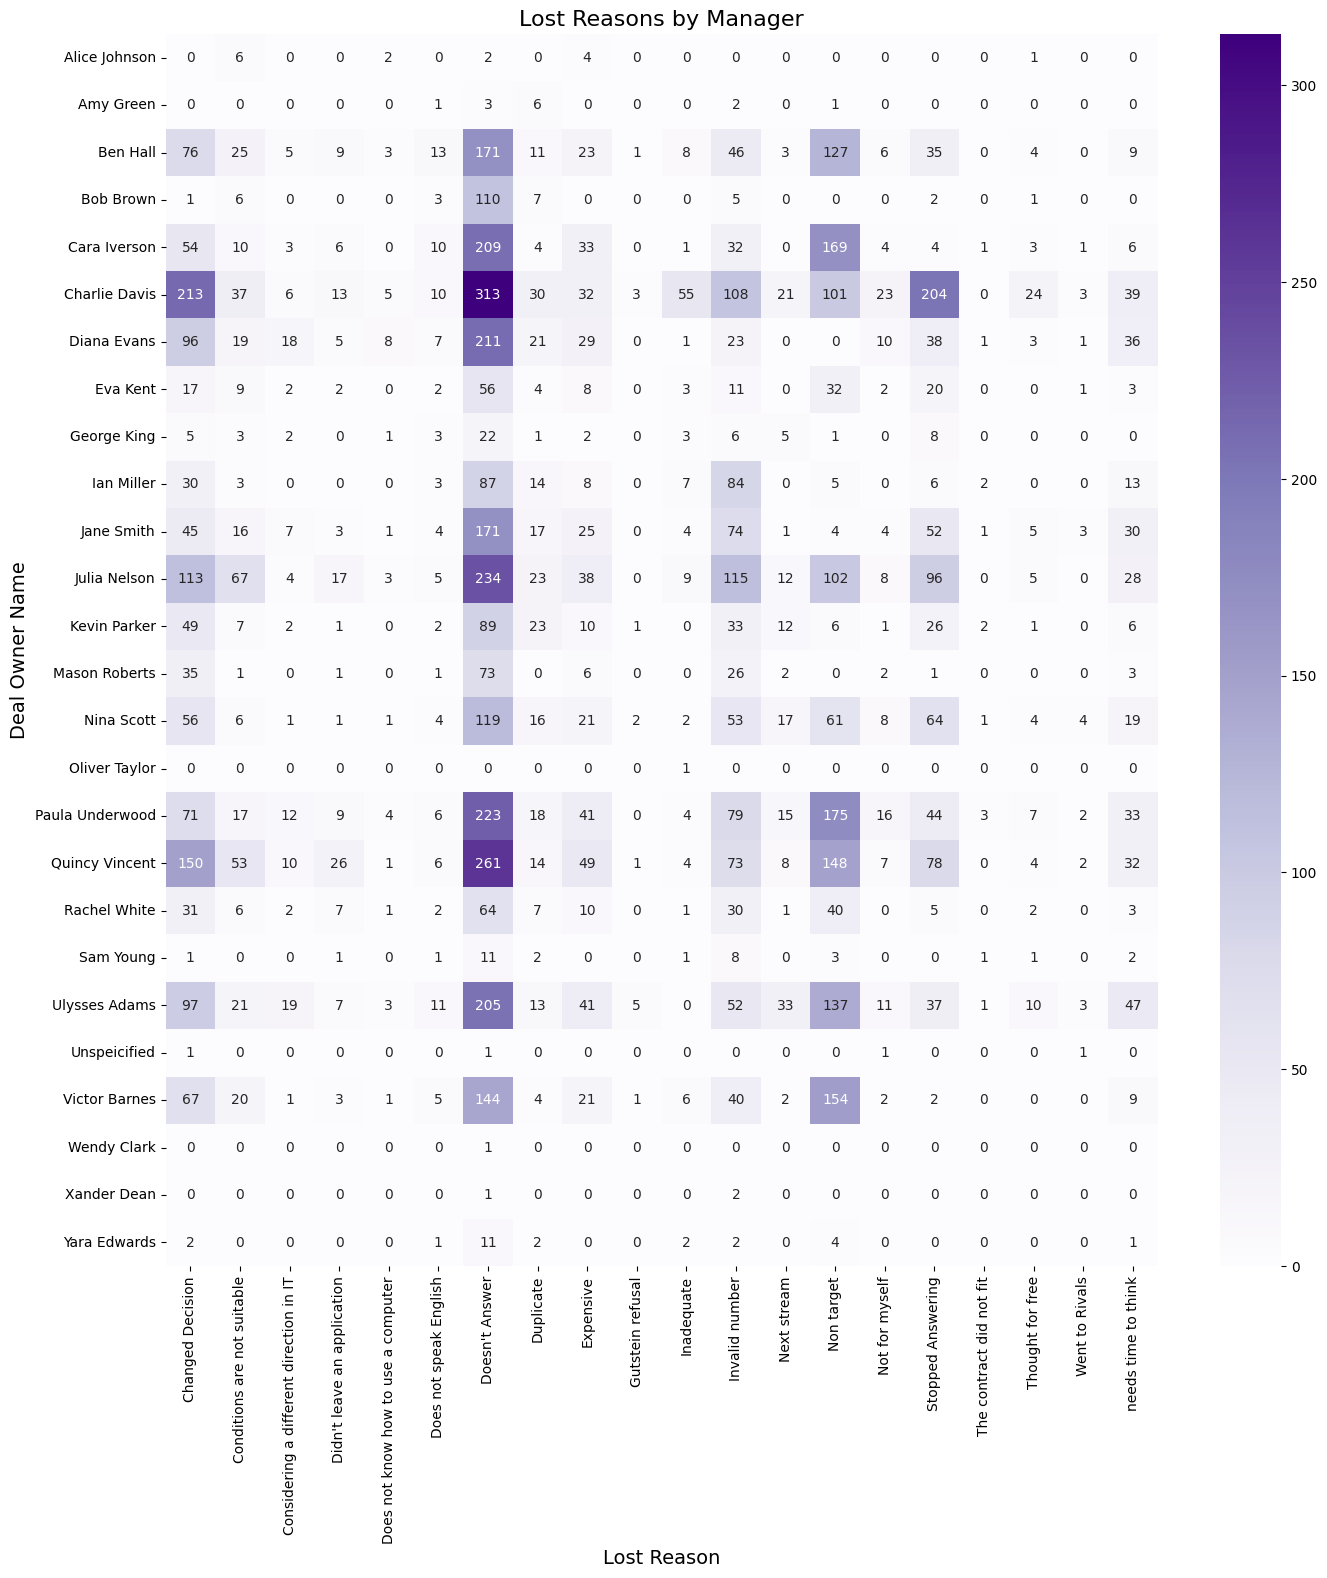

In [208]:
filtered_deals = deals[deals['Lost Reason'] != 'No reason']
pivot_table = filtered_deals.pivot_table(
    index='Deal Owner Name',
    columns='Lost Reason',
    values='Contact Name',
    aggfunc='count',
    fill_value=0
)

pivot_table = pivot_table.round(0).astype(int)

plt.figure(figsize=(16, 16))
sns.heatmap(pivot_table, cmap='Purples', annot=True, fmt='d')
plt.title('Lost Reasons by Manager', fontsize=16)
plt.xlabel('Lost Reason', fontsize=14)
plt.ylabel('Deal Owner Name', fontsize=14)
plt.show()


**Построение зависимости конверсии и тотал аммаунт в работе менеджеров при продаже услуги**

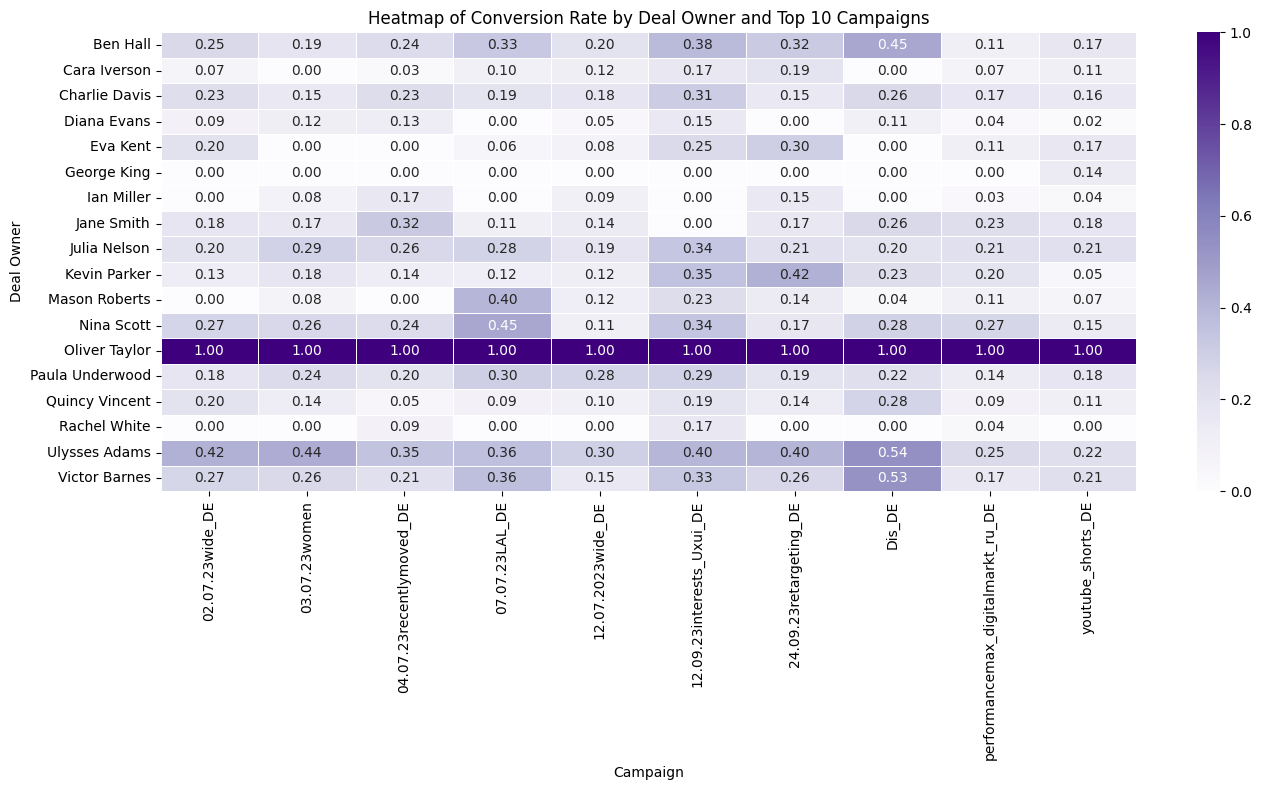

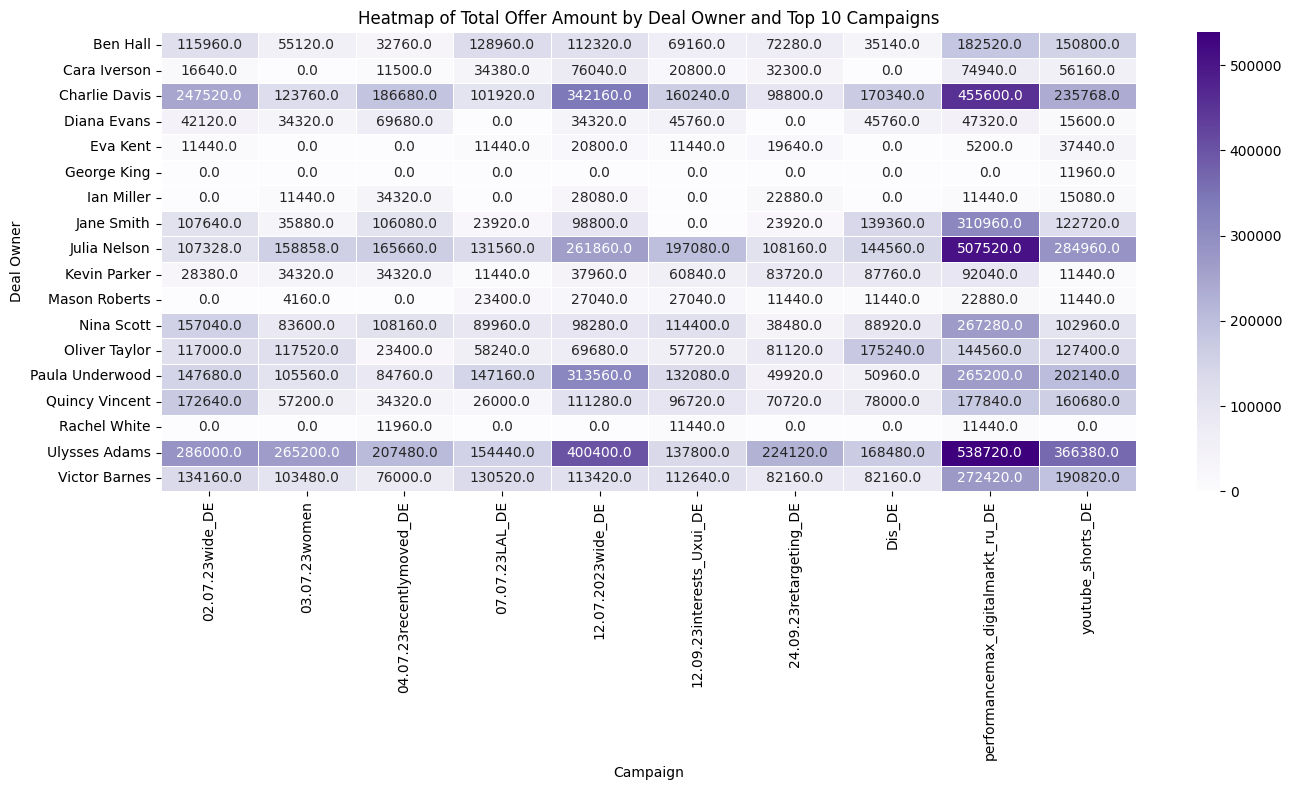

In [207]:
owner_campaigns = deals[deals['Campaign'] != 'No campaign'].groupby(['Deal Owner Name', 'Campaign']).agg(
    total_deals=('Status', 'count'),
    successful_deals=('Is Successful', 'sum'),
    total_sales=('Initial Amount Paid', 'sum'),
    total_offer_amount=('Offer Total Amount', 'sum')
).reset_index()

owner_campaigns['conversion_rate'] = owner_campaigns['successful_deals'] / owner_campaigns['total_deals']


top_campaigns = owner_campaigns.groupby('Campaign')['successful_deals'].sum().sort_values(ascending=False).head(10).index

filtered_owner_campaigns = owner_campaigns[owner_campaigns['Campaign'].isin(top_campaigns)]
conversion_heatmap_data = filtered_owner_campaigns.pivot_table(
    values='conversion_rate',
    index='Deal Owner Name',
    columns='Campaign',
    aggfunc='mean',
    fill_value=0
)

conversion_heatmap_data = conversion_heatmap_data.loc[
    (conversion_heatmap_data.sum(axis=1) > 0),
    (conversion_heatmap_data.sum(axis=0) > 0)
]


plt.figure(figsize=(14, 8))
sns.heatmap(conversion_heatmap_data, annot=True, cmap='Purples', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Heatmap of Conversion Rate by Deal Owner and Top 10 Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Deal Owner')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

offer_amount_heatmap_data = filtered_owner_campaigns.pivot_table(
    values='total_offer_amount',
    index='Deal Owner Name',
    columns='Campaign',
    aggfunc='sum',
    fill_value=0
)

offer_amount_heatmap_data = offer_amount_heatmap_data.loc[
    (offer_amount_heatmap_data.sum(axis=1) > 0),
    (offer_amount_heatmap_data.sum(axis=0) > 0)
]

# Построение heatmap для total_offer_amount
plt.figure(figsize=(14, 8))
sns.heatmap(offer_amount_heatmap_data, annot=True, cmap='Purples', fmt='.1f', cbar=True, linewidths=0.5)
plt.title('Heatmap of Total Offer Amount by Deal Owner and Top 10 Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Deal Owner')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **ЗАВИСИМОСТЬ УСПЕШНОСТИ ОТ ТИПА ПЛАТЕЖА**

Тип оплаты оказывает существенное влияние на сумму начального платежа. Клиенты, выбирающие разовые платежи, в среднем платят больше, чем клиенты, выбирающие регулярные платежи.
Продукт также влияет на сумму начального платежа. Продукты Digital Marketing и UX/UI Design в среднем стоят дороже, чем Web Developer.




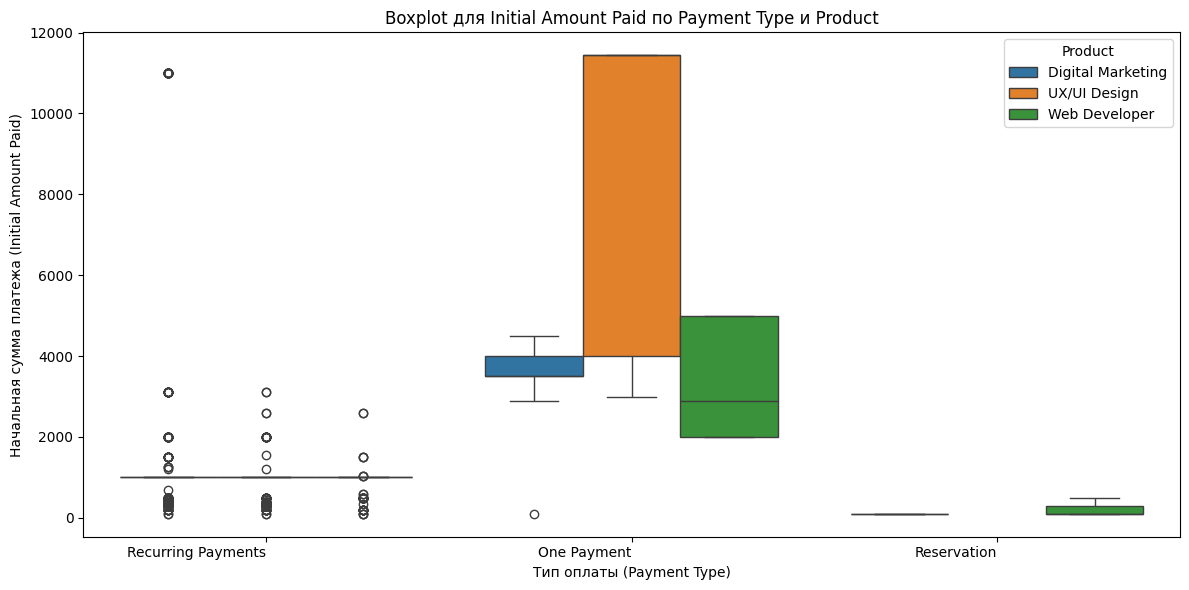

In [188]:
filtered_deals = deals[
    (deals['Initial Amount Paid'] > 0) &
    (deals['Product'] != 'Not chosen')
]

# Строим boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_deals,
    x='Payment Type',
    y='Initial Amount Paid',
    hue='Product'
)

plt.title('Boxplot для Initial Amount Paid по Payment Type и Product')
plt.xlabel('Тип оплаты (Payment Type)')
plt.ylabel('Начальная сумма платежа (Initial Amount Paid)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

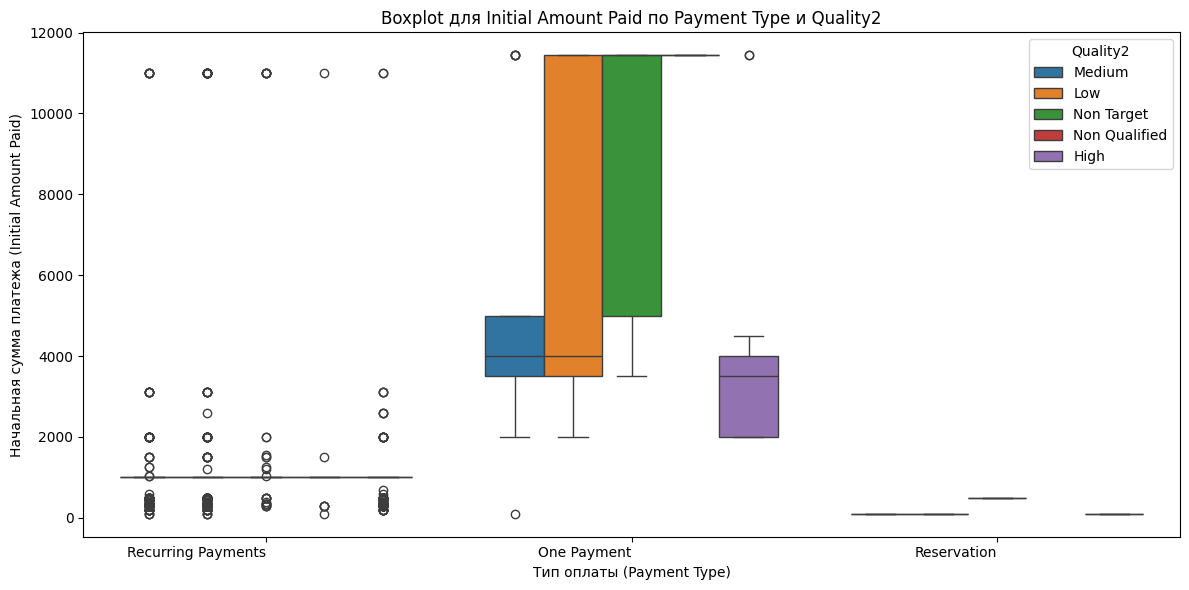

In [190]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_deals,
    x='Payment Type',
    y='Initial Amount Paid',
    hue='Quality2'
)

plt.title('Boxplot для Initial Amount Paid по Payment Type и Quality2')
plt.xlabel('Тип оплаты (Payment Type)')
plt.ylabel('Начальная сумма платежа (Initial Amount Paid)')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

Клиенты, выбирающие разовые платежи и более высокое качество, в среднем платят больше. Recurring Payments например имеют наименьшую медиану и размах, что указывает на более низкие начальные платежи по сравнению с другими типами оплаты. Большое количество выбросов свидетельствует о значительном разнообразии платежей в этом сегменте.